<a href="https://colab.research.google.com/github/princevalerie/All_project/blob/main/Classification%20Prediction%20Scikit%20Learn/Credit_Scoring_using_LogisticReg%2CRandomForest%2CDecisionTree_Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
sns.set_theme(color_codes=True)

In [41]:
df=pd.read_csv("/content/drive/MyDrive/home_credit/application_train.csv")
df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [42]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

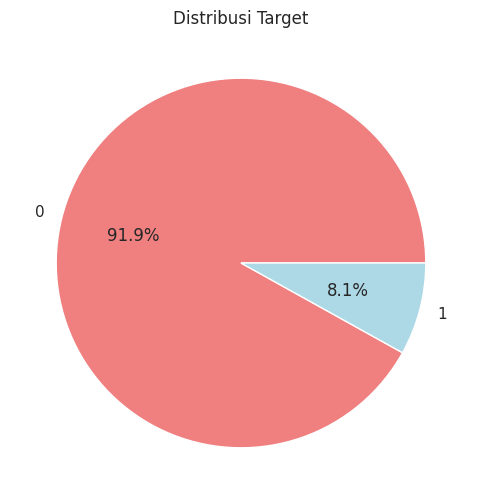

In [43]:
# Menghitung jumlah nilai unik dalam kolom 'TARGET'
target_counts = df['TARGET'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribusi Target')
plt.show()

#Exploratory Data Analysis

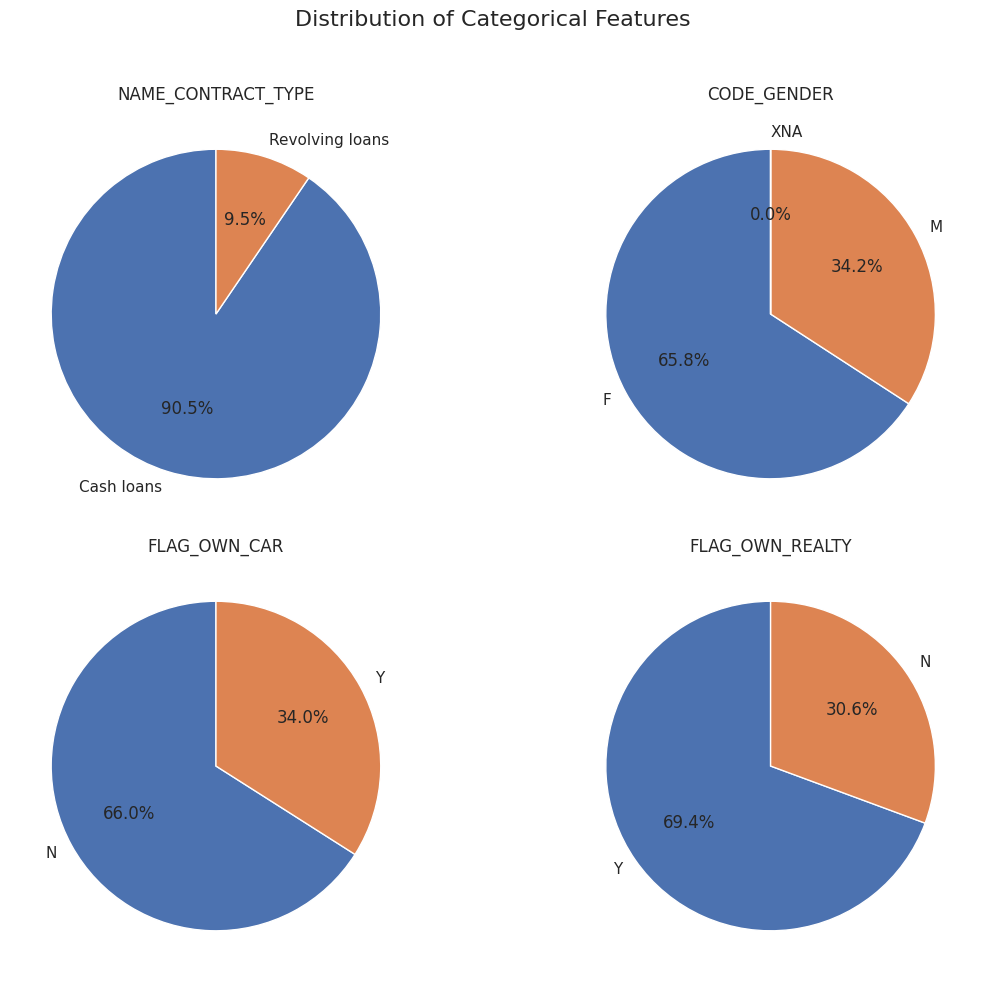

In [44]:
selected_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Plot a pie chart for each selected feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

for i, feature in enumerate(selected_features):
    ax = axes.flatten()[i]
    feature_counts = selected_df[feature].value_counts()
    ax.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent clipping of the title
plt.show()

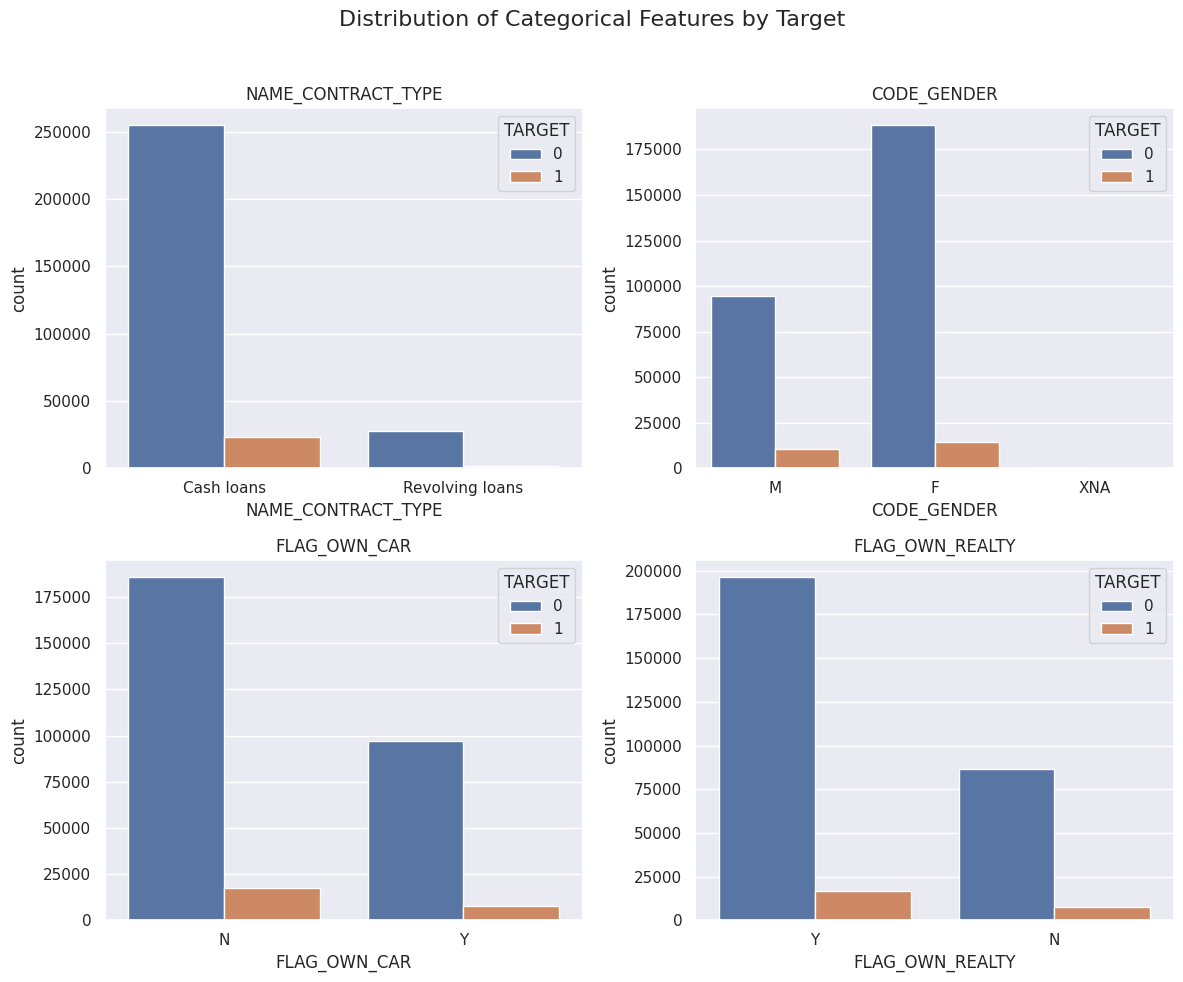

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'df' with the actual variable name of your DataFrame

selected_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Create a DataFrame with selected features and the target variable
selected_df = df[selected_features + ['TARGET']]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Features by Target', fontsize=16)

for i, feature in enumerate(selected_features):
    ax = axes.flatten()[i]
    sns.countplot(x=feature, hue='TARGET', data=selected_df, ax=ax)
    ax.set_title(feature)
    ax.legend(title='TARGET', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent clipping of the title
plt.show()


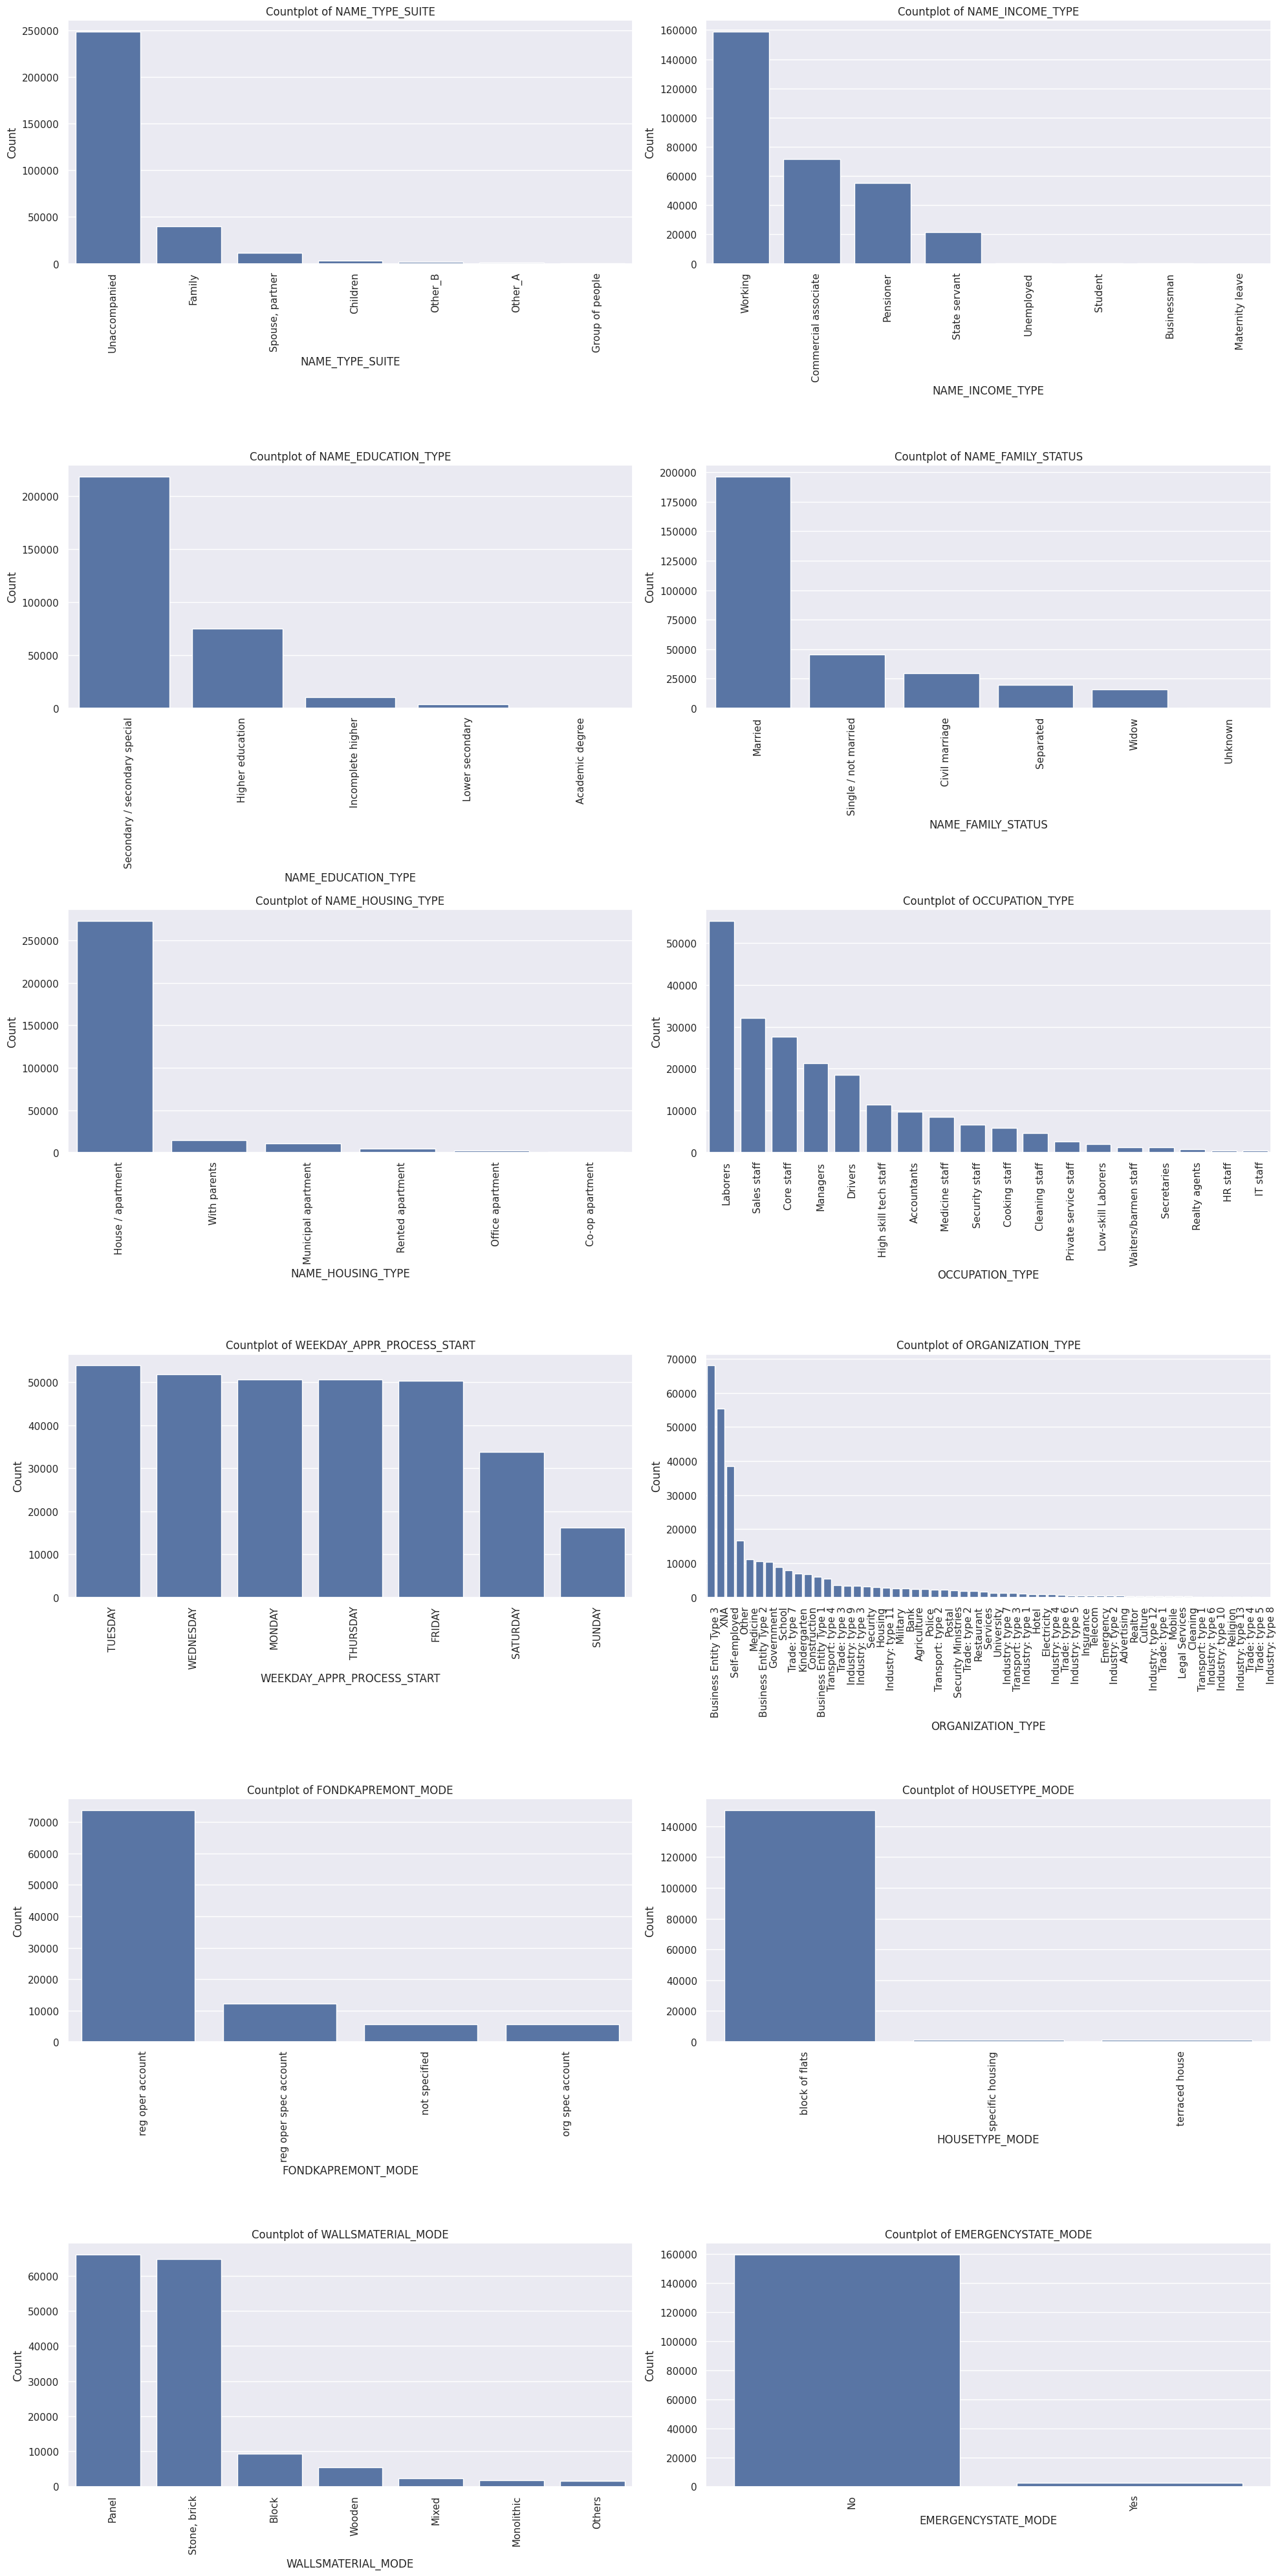

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# data kategorikal
target_columns = [ 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# create figure with subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20, 40))  # Menyesuaikan ukuran gambar
axs = axs.flatten()

# create countplot for each categorical variable
for i, var in enumerate(target_columns):
    sorted_values = df[var].value_counts().index  # Mendapatkan nilai yang diurutkan
    sns.countplot(x=var, data=df, order=sorted_values, ax=axs[i])  # Menggunakan order parameter untuk mengurutkan
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(),  rotation=90, ha='left')
    axs[i].set_title(f'Countplot of {var}')
    axs[i].set_ylabel('Count')

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()




##Explore Amount

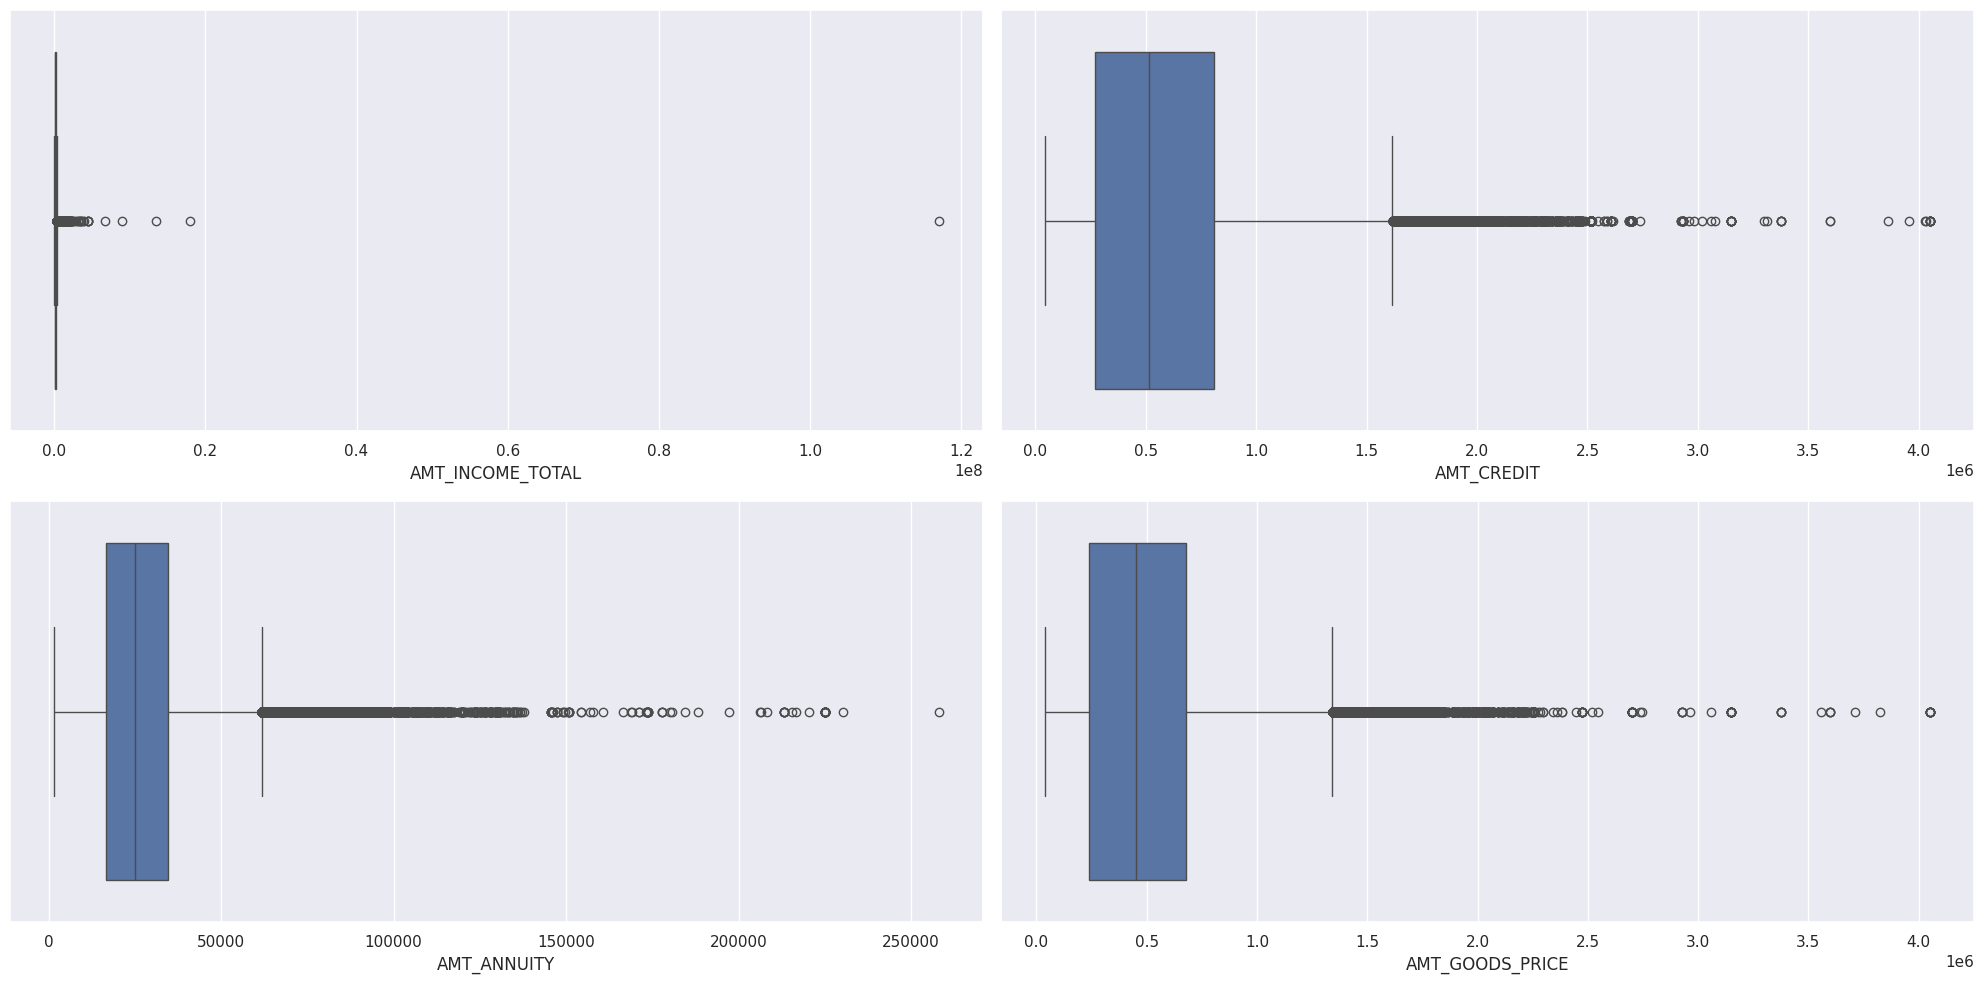

In [47]:
num_vars = ["AMT_INCOME_TOTAL",	"AMT_CREDIT"	,"AMT_ANNUITY",	"AMT_GOODS_PRICE"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

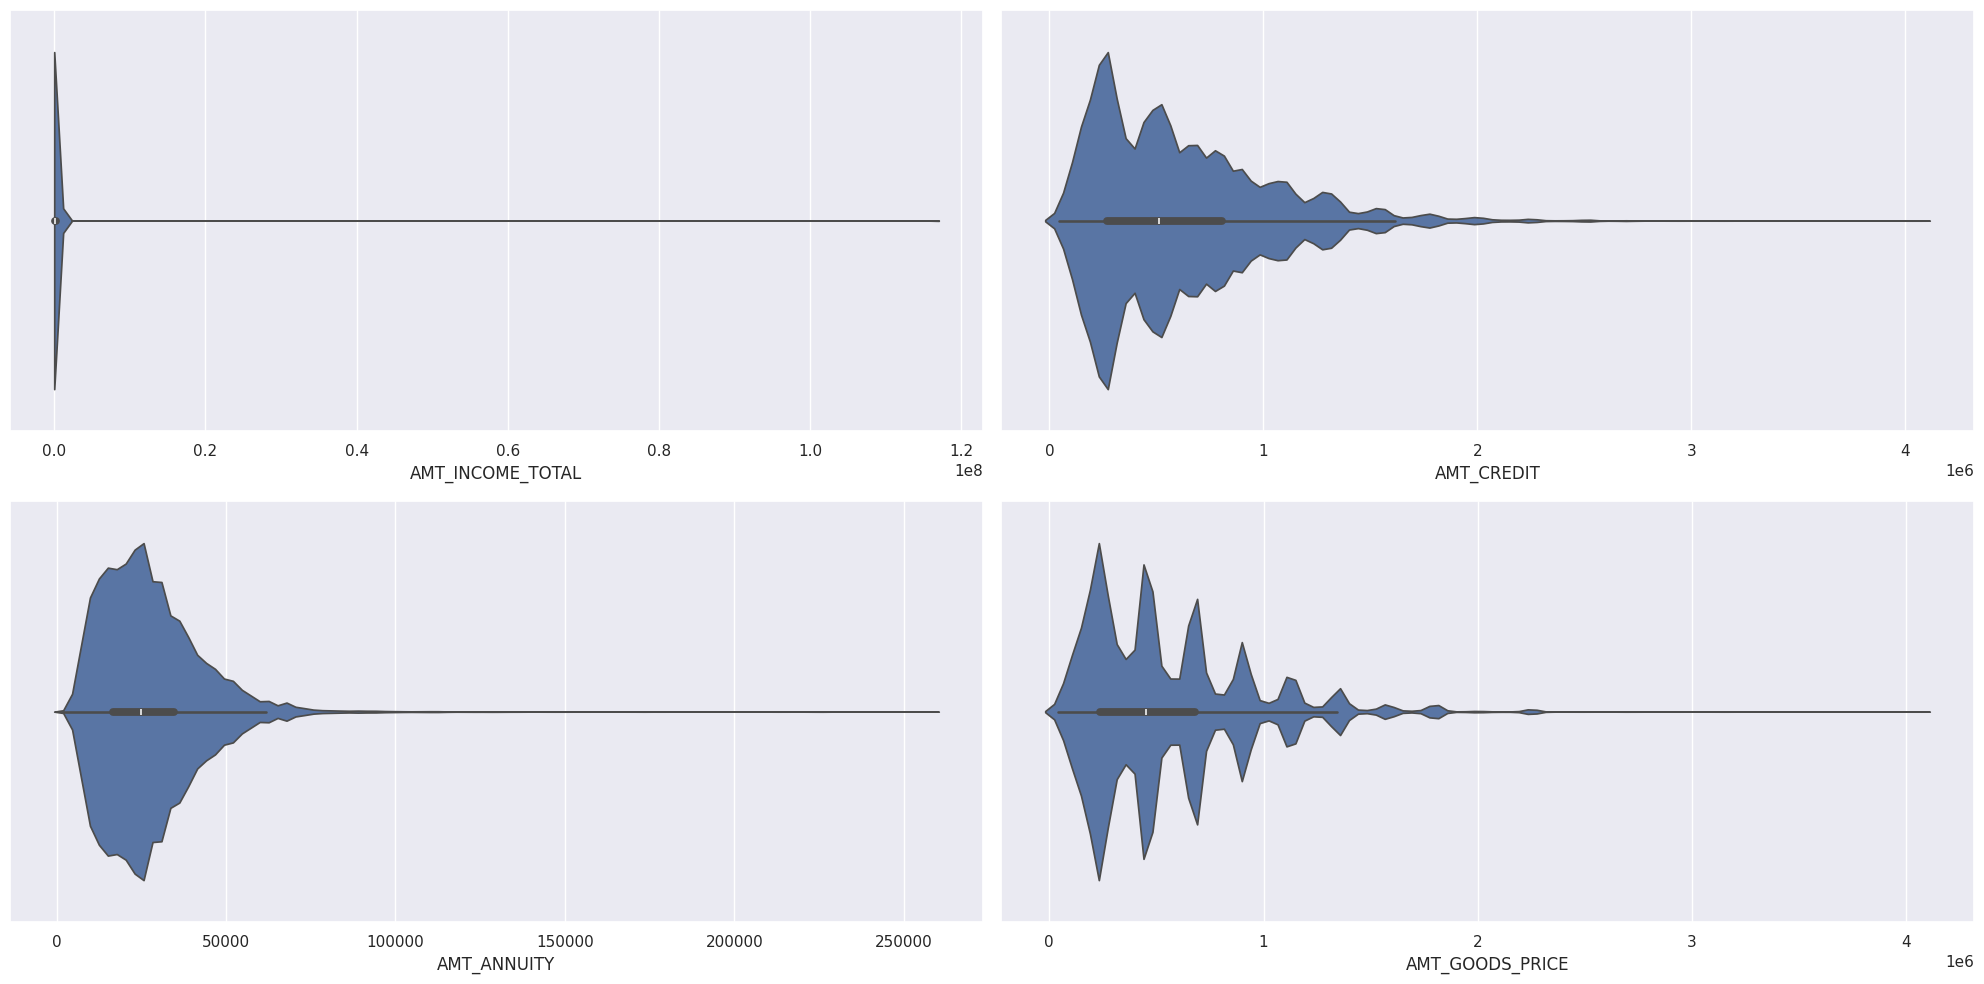

In [48]:
num_vars = ["AMT_INCOME_TOTAL",	"AMT_CREDIT"	,"AMT_ANNUITY",	"AMT_GOODS_PRICE"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

##Explore Days Distribution

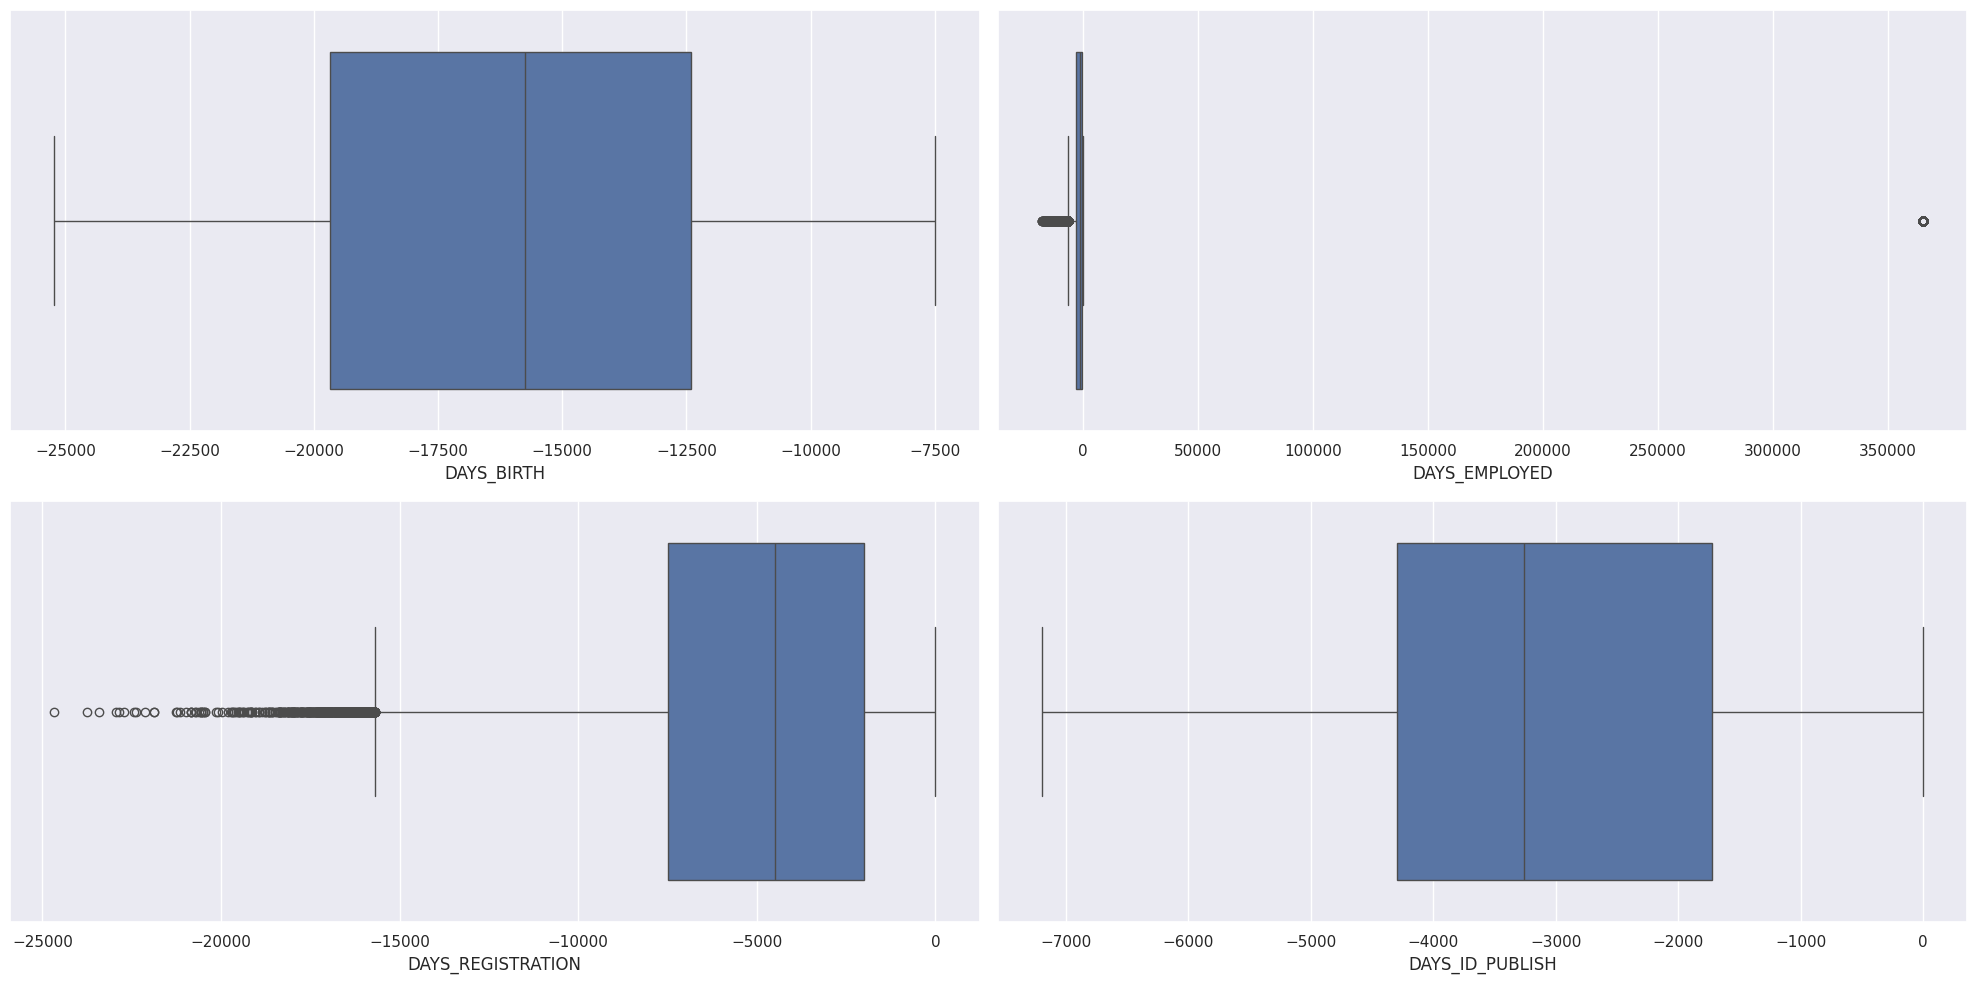

In [49]:
num_vars = ["DAYS_BIRTH",	"DAYS_EMPLOYED",	"DAYS_REGISTRATION",	"DAYS_ID_PUBLISH"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# plt.show()

##Explore Numeric Distribution

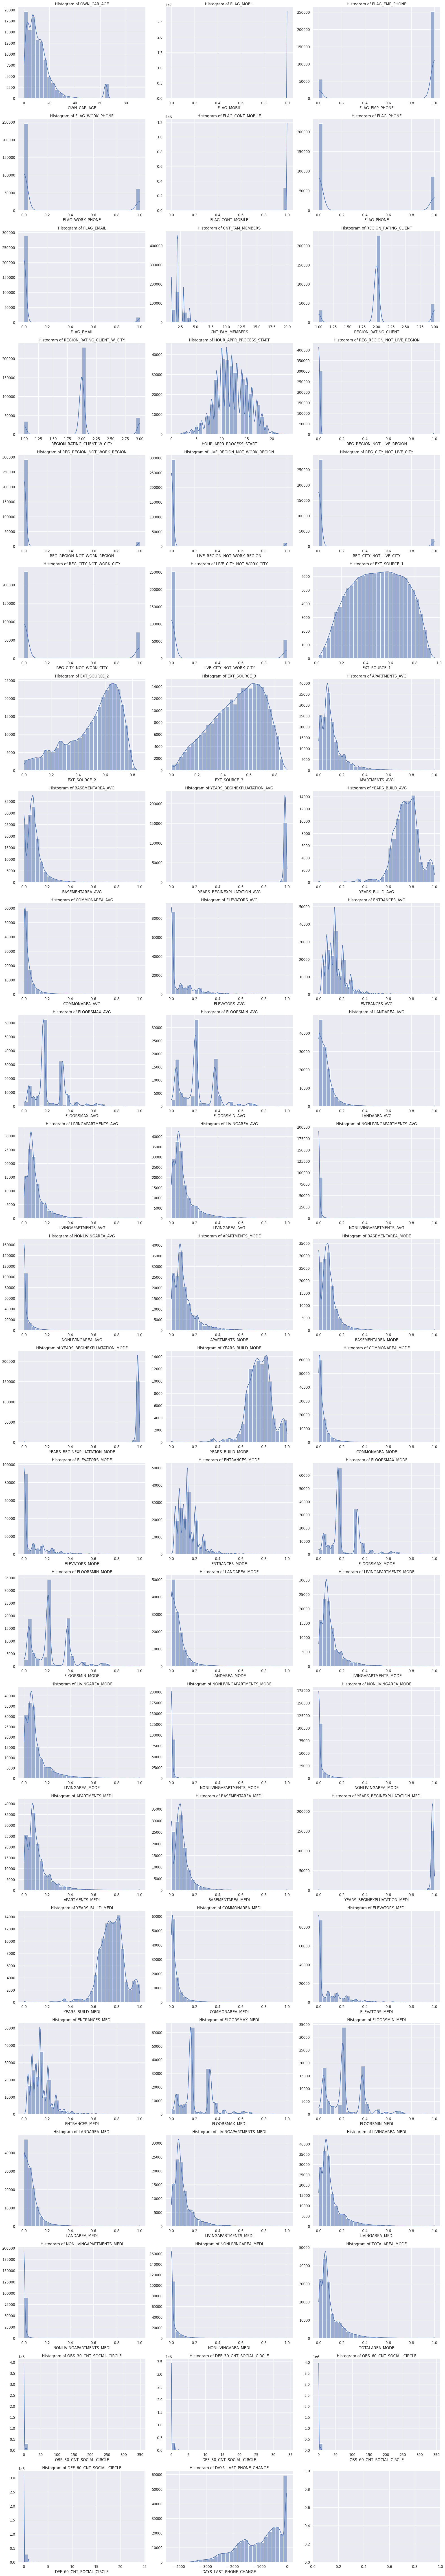

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan variabel numerik
num_vars = ['OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
            'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
            'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
            'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
            'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
            'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
            'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']

# Menghitung jumlah subplot yang diperlukan berdasarkan jumlah variabel numerik
num_subplots = len(num_vars)
num_rows = (num_subplots // 3) + 1  # Tiga subplot per baris
num_cols = min(3, num_subplots)  # Maksimal tiga subplot per baris

# Membuat subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axs = axs.flatten()

# Melakukan loop melalui variabel numerik dan membuat histogram untuk masing-masing
for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i], bins=30, kde=True)
    axs[i].set_title(f'Histogram of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('')

# Mengatur layout
fig.tight_layout()

plt.show()


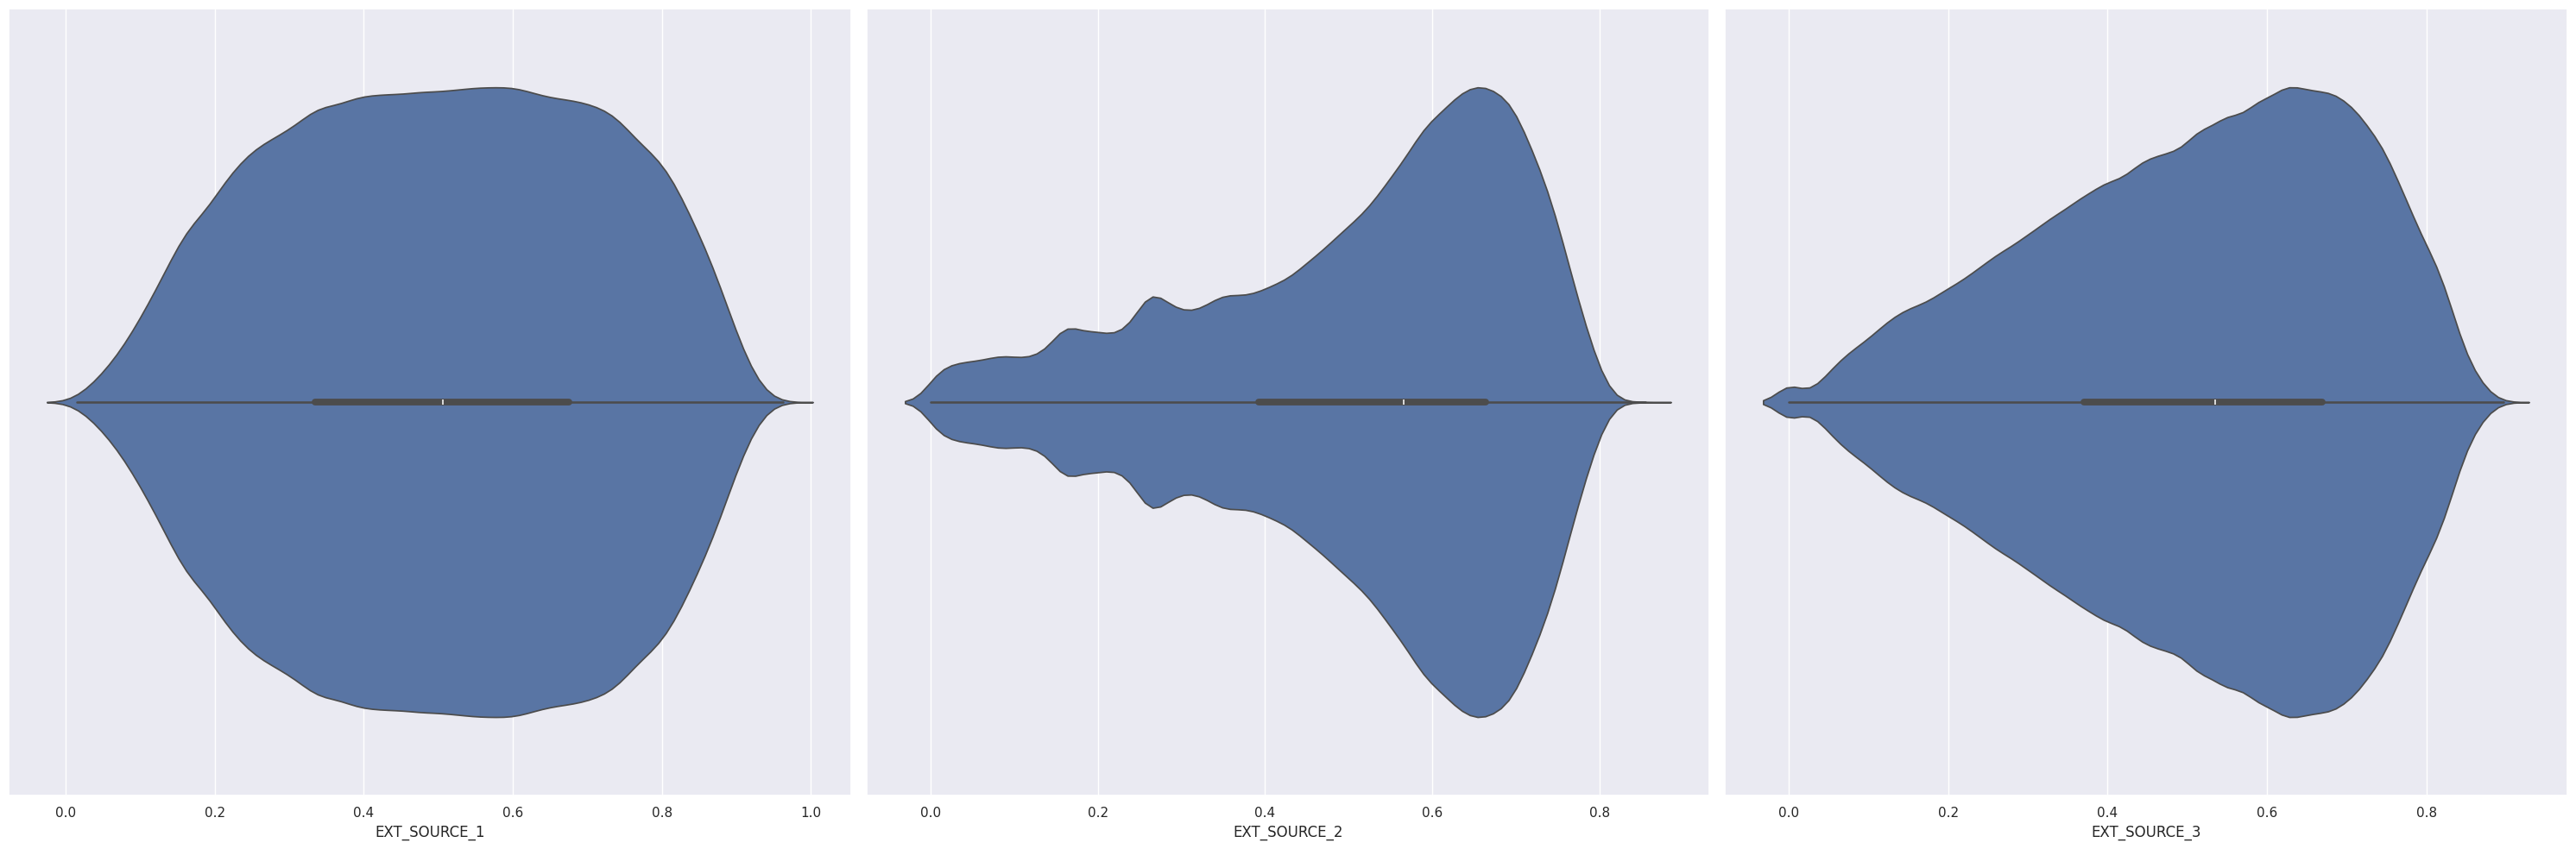

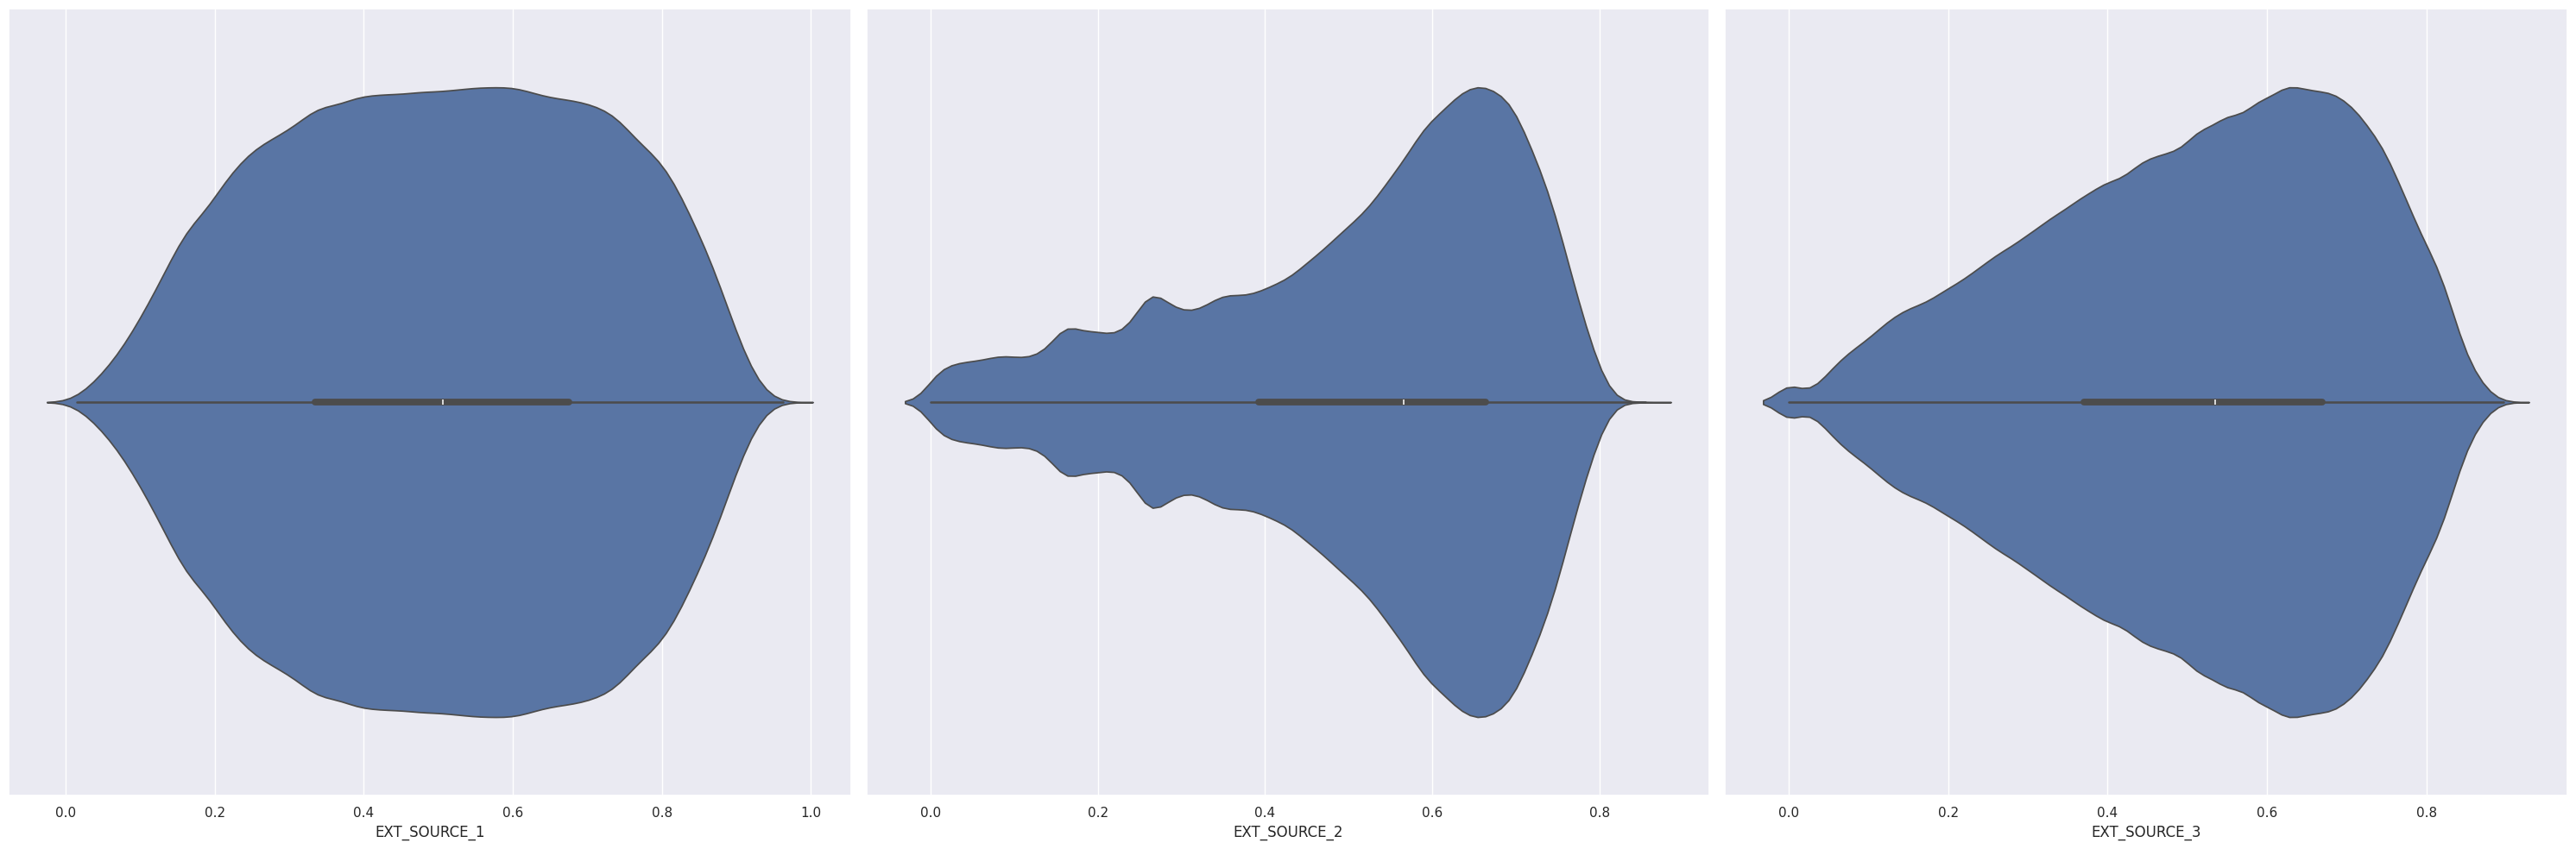

In [50]:
num_vars = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

##Explore Document Distribution

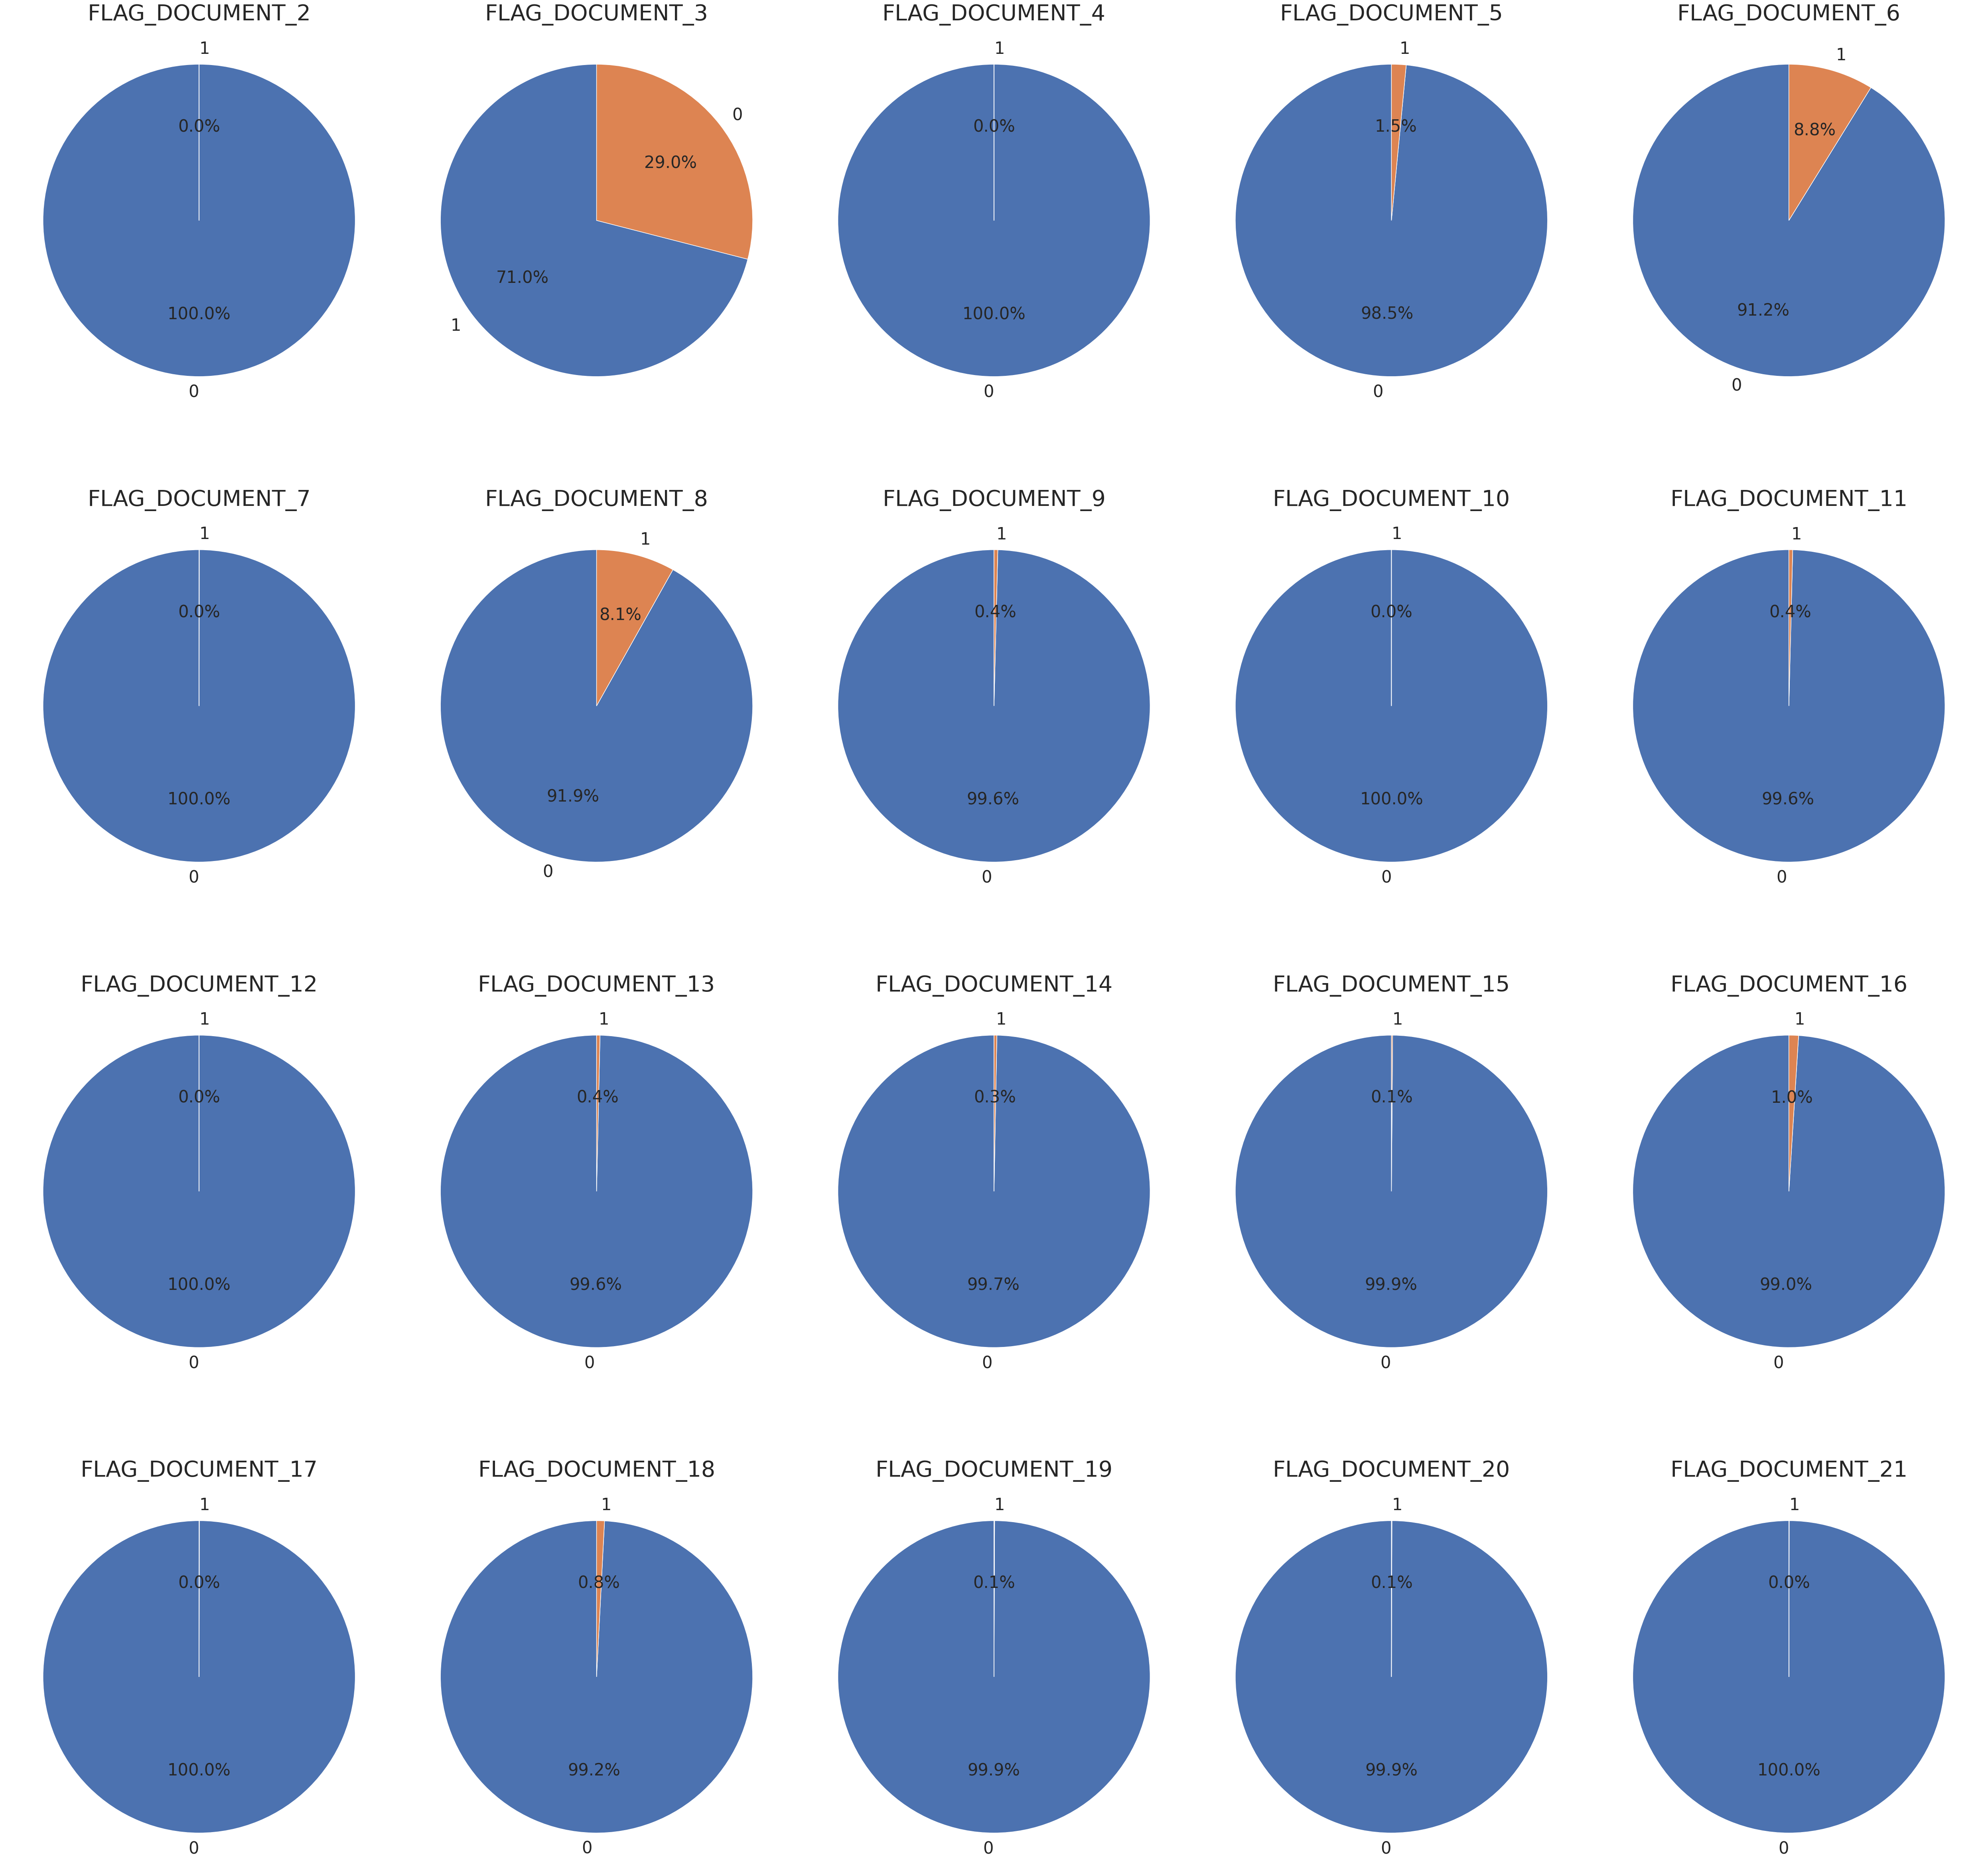

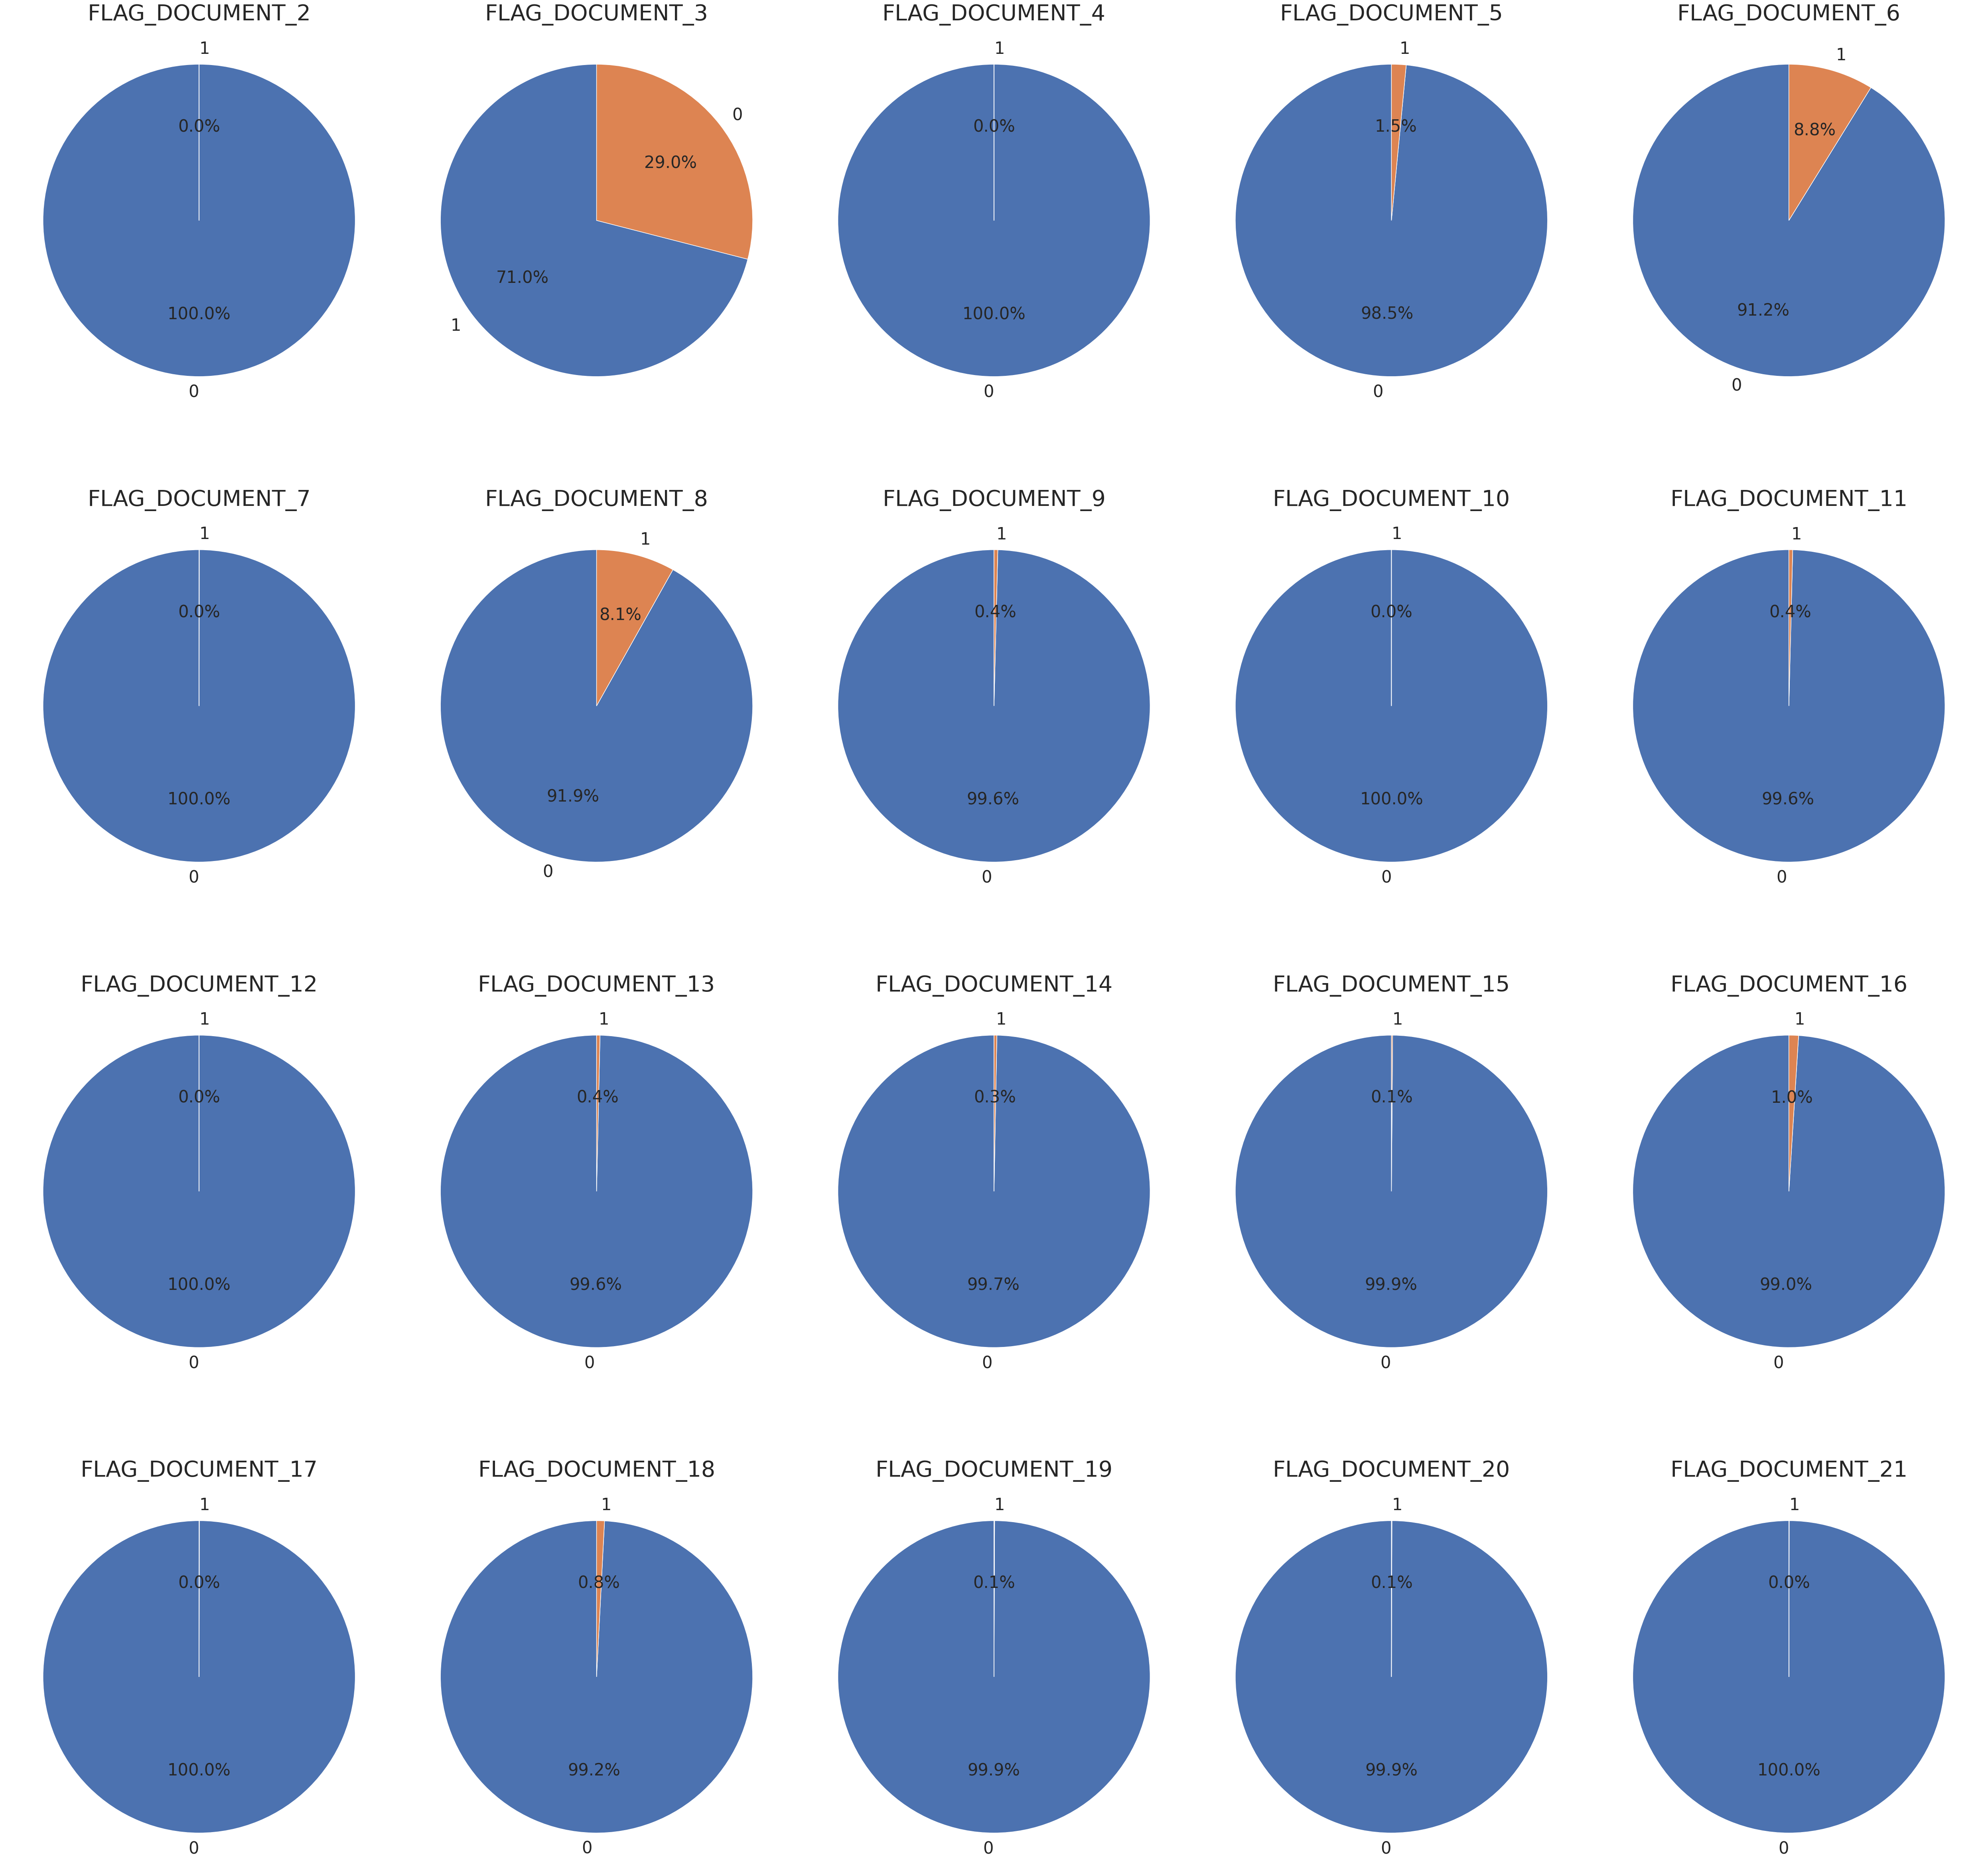

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Variabel yang akan diplot
doc_vars = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Membuat subplot
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(50,50))

# Ratakan array 2D menjadi 1D agar lebih mudah diiterasi
axs = axs.flatten()

# Membuat pie chart untuk setiap variabel
for i, var in enumerate(doc_vars):
    # Menghitung total jumlah dokumen untuk variabel saat ini
    total_documents = df[var].value_counts()

    # Membuat pie chart
    axs[i].pie(total_documents, labels=total_documents.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 30})  # Atur ukuran font di sini
    axs[i].set_title(var, fontsize=40)  # Atur ukuran font di sini

# Menghilangkan subplot yang kosong
for j in range(len(doc_vars), 4 * 5):
    fig.delaxes(axs[j])

plt.tight_layout()

plt.show()

##Explore Enquiries

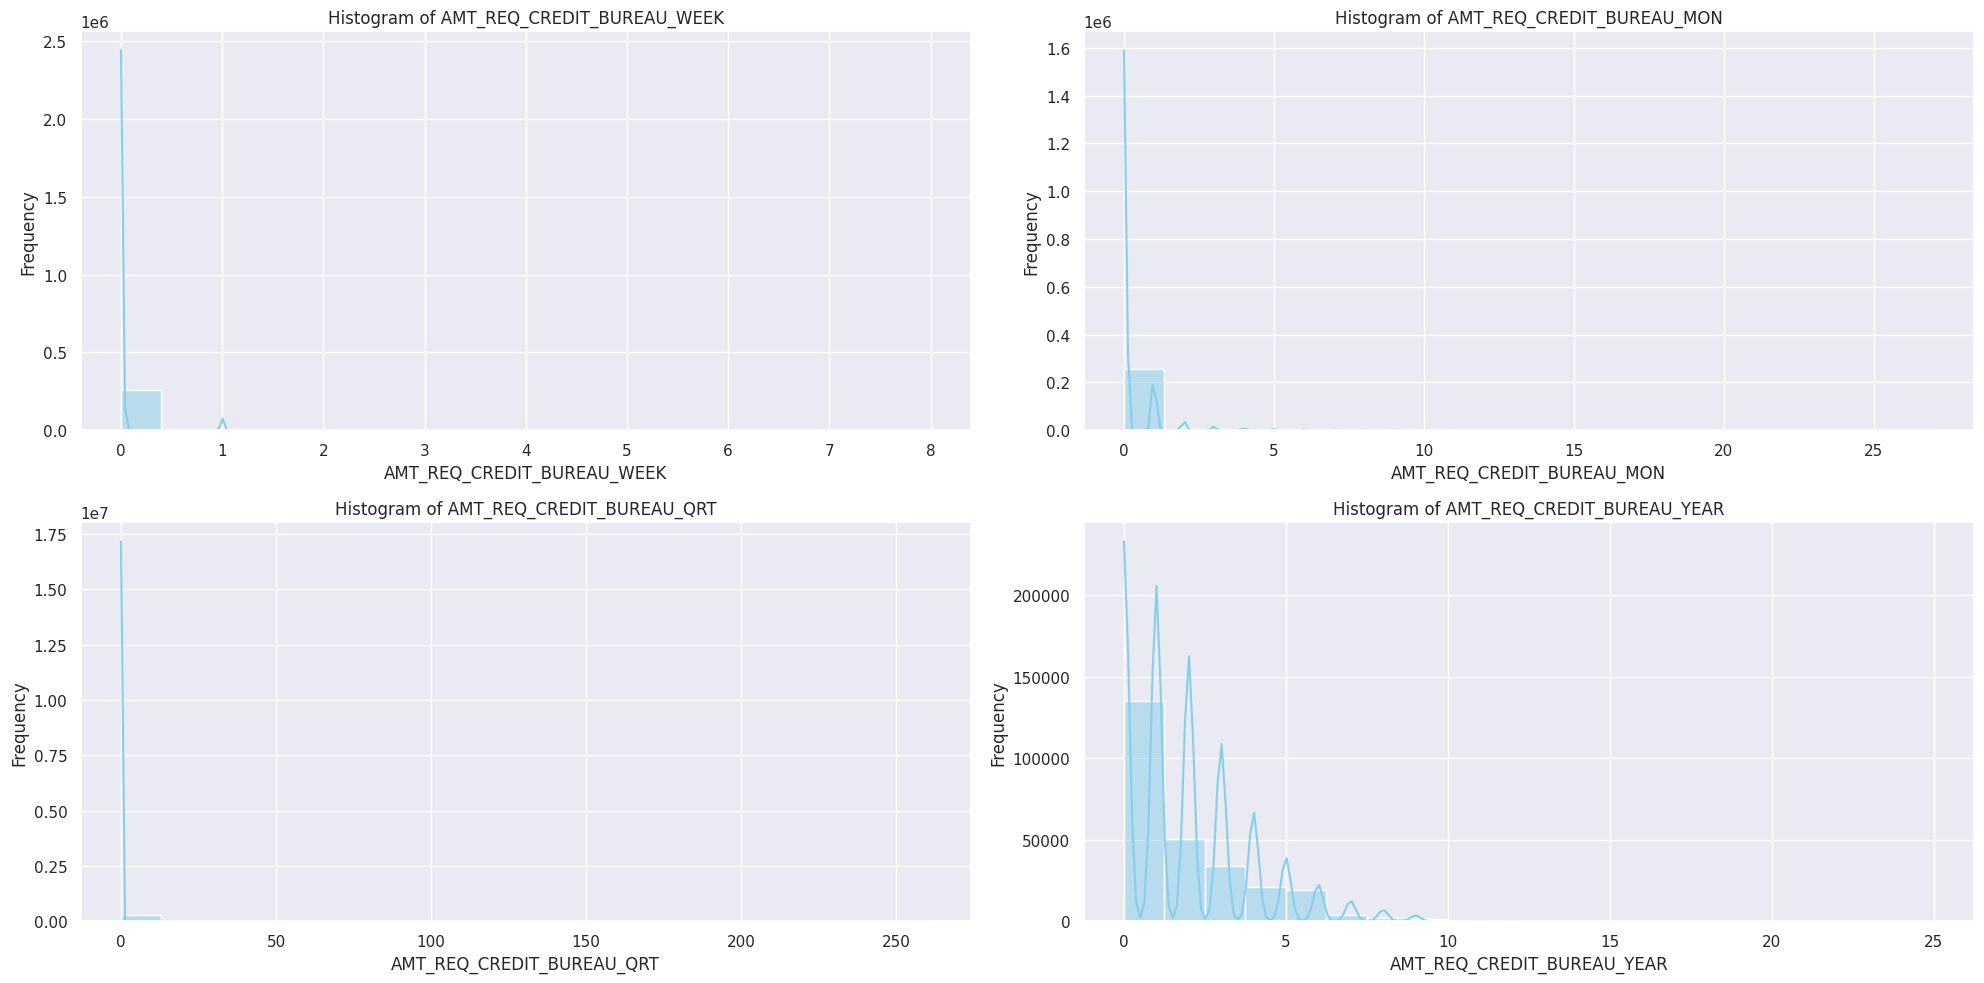

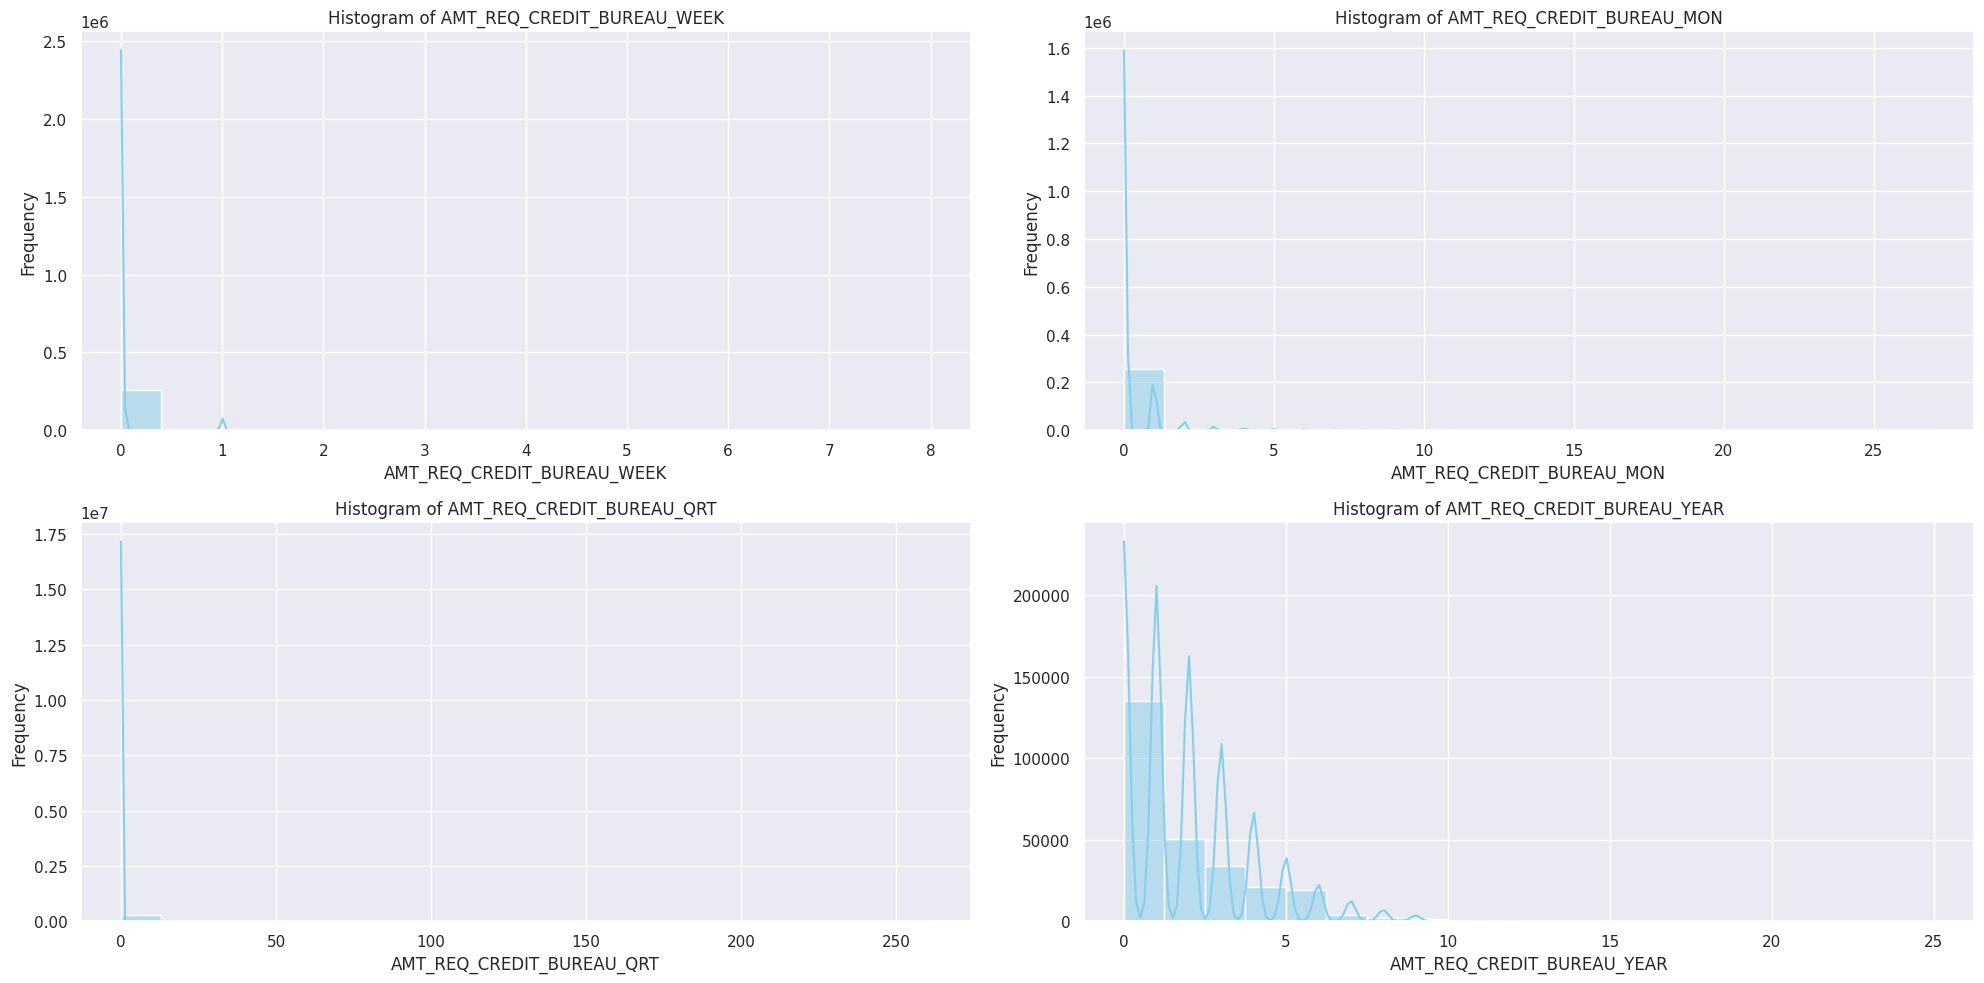

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variabel yang akan diplot
num_vars = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Membuat subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Membuat histogram untuk setiap variabel
for i, var in enumerate(num_vars):
    sns.histplot(df[var], kde=True, ax=axs[i], color='skyblue', bins=20)
    axs[i].set_title(f'Histogram of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

fig.tight_layout()
plt.show()


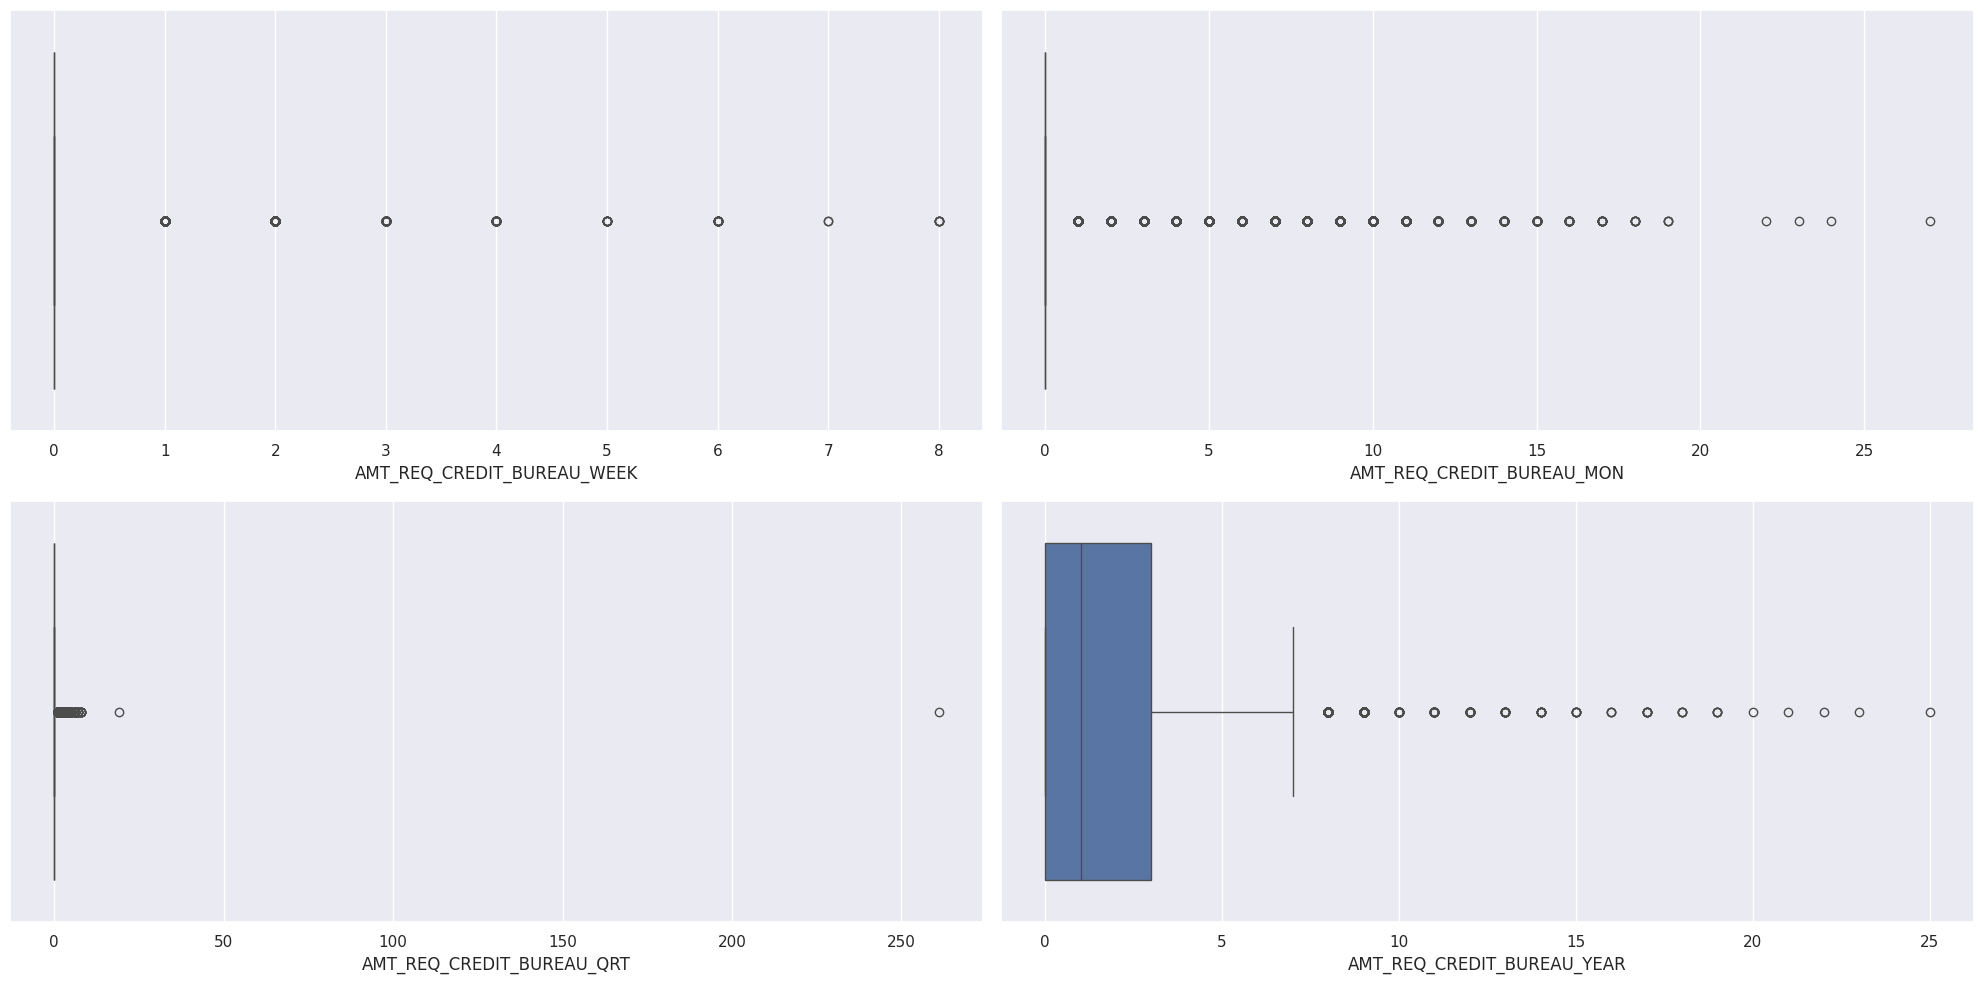

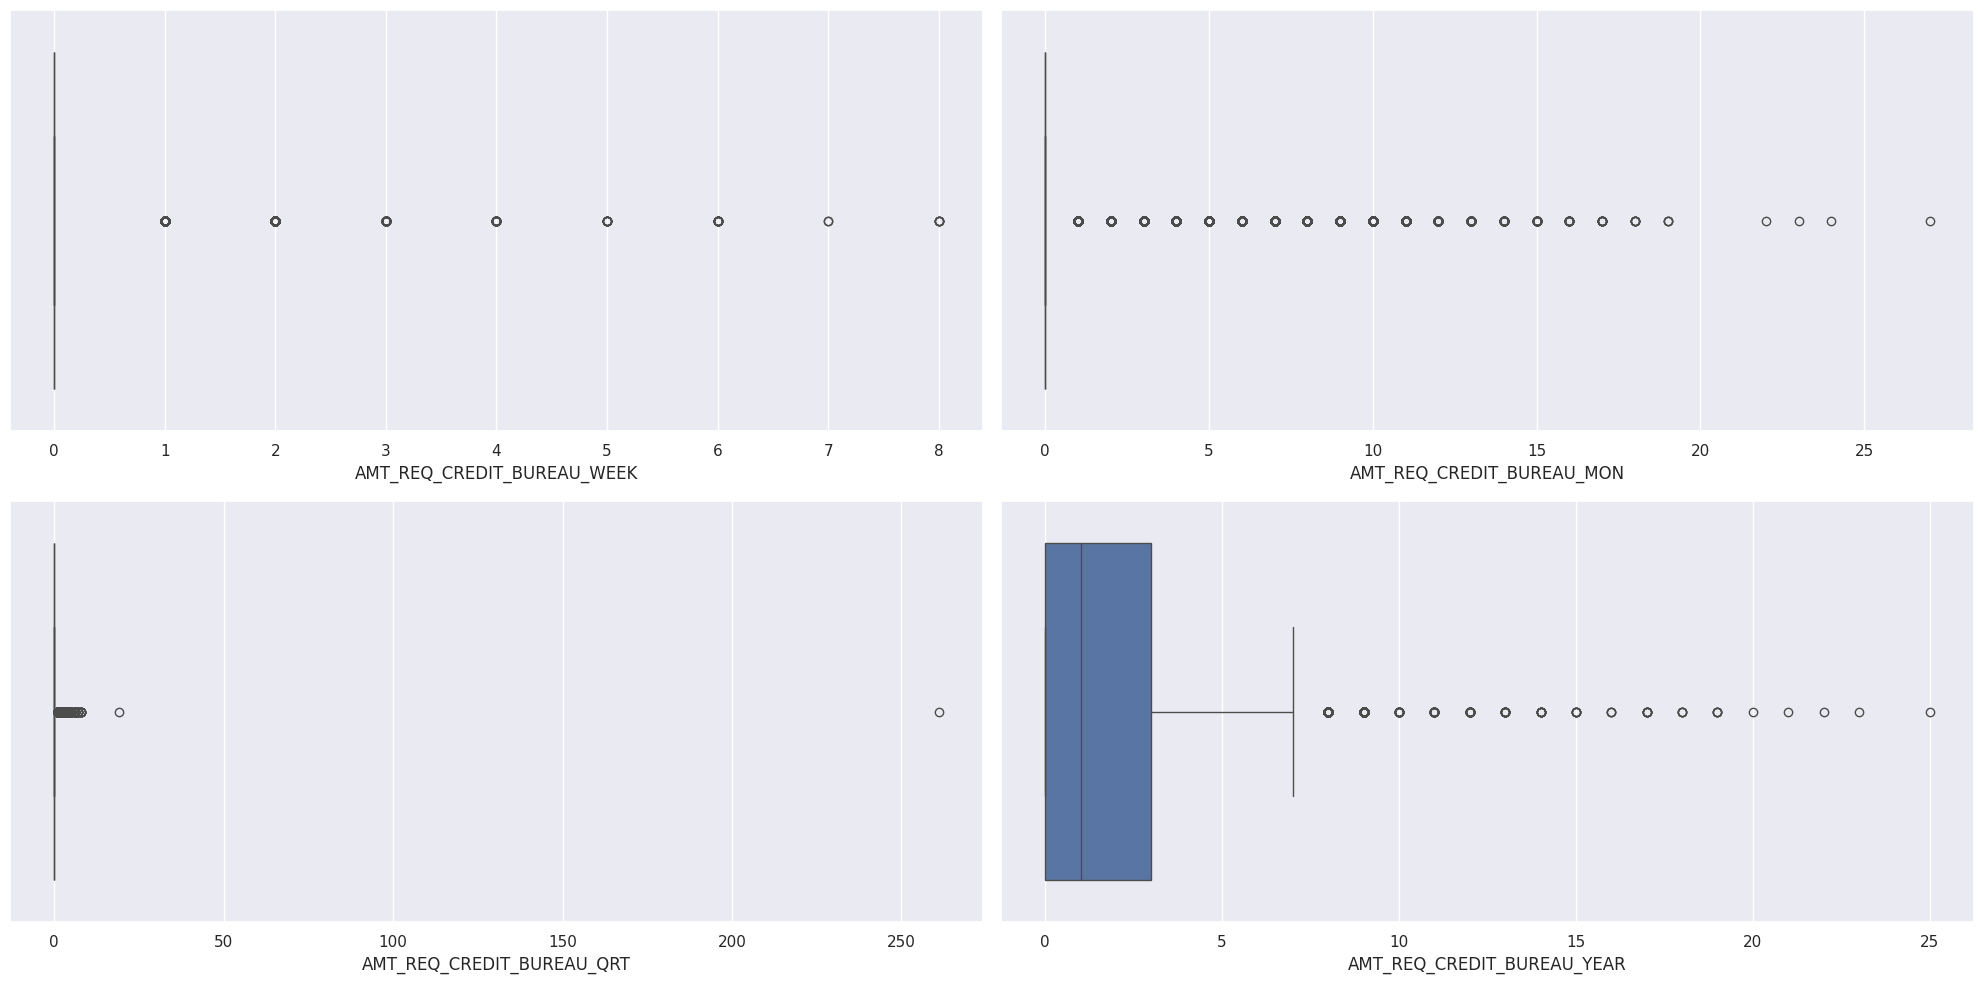

In [53]:
num_vars = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

#Data Cleaning

##Handling Data Missing

In [54]:
columns_with_many_nulls = df.columns[df.isnull().any()]
columns_with_many_nulls

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [55]:
cols_to_fill_with_zero = ['AMT_ANNUITY', 'AMT_GOODS_PRICE','OWN_CAR_AGE','CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                          'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

df[cols_to_fill_with_zero] = df[cols_to_fill_with_zero].fillna(0)

In [56]:
# Identify rows with null values in any of the specified columns
rows_to_drop = df[df.isnull().any(axis=1)].index

# Drop rows with null values in any of the specified columns
df = df.drop(index=rows_to_drop)

##Handling Outlier

In [57]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
for column_name in numeric_columns.columns:
    print(f"'{column_name}',",end='')

'SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','

In [58]:
outlier_iqr_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
# Initialize an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Loop through each column and filter outliers
for column in outlier_iqr_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers for the current column
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Append the outliers for the current column to the overall outliers DataFrame
    outliers_df = pd.concat([outliers_df, column_outliers])

outliers_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
91          100108       0         Cash loans           F            N   
92          100110       0         Cash loans           M            Y   
144         100166       0         Cash loans           F            N   
180         100209       1    Revolving loans           M            N   
182         100211       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
306911      455581       0         Cash loans           M            Y   
306935      455606       0         Cash loans           M            Y   
307364      456089       0         Cash loans           F            N   
307373      456098       0         Cash loans           F            N   
307418      456151       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
91                   Y             3          171000.0    545040.0   
92                   Y             3          135000.0    373140.0   
144                  Y             3           58500.0    152820.0   
180                  Y             3          180000.0    540000.0   
182                  N             3          225000.0    746280.0   
...                ...           ...               ...         ...   
306911               Y             0          247500.0    594261.0   
306935               Y             0          157500.0    450000.0   
307364               Y             0          112500.0    787131.0   
307373               N             1           67500.0    177903.0   
307418               N             0           90000.0    369720.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
91          31288.5         450000.0   Unaccompanied               Working   
92          25065.0         337500.0   Unaccompanied  Commercial associate   
144         15241.5         135000.0   Unaccompanied               Working   
180         27000.0         540000.0   Unaccompanied  Commercial associate   
182         49873.5         675000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
306911      51133.5         526500.0   Unaccompanied               Working   
306935      35685.0         450000.0   Unaccompanied               Working   
307364      30631.5         679500.0   Unaccompanied  Commercial associate   
307373      14391.0         148500.0   Unaccompanied               Working   
307418      22747.5         292500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
91      Secondary / secondary special               Married   
92      Secondary / secondary special               Married   
144     Secondary / secondary special               Married   
180                  Higher education               Married   
182     Secondary / secondary special               Married   
...                               ...                   ...   
306911  Secondary / secondary special  Single / not married   
306935  Secondary / secondary special               Married   
307364  Secondary / secondary special               Married   
307373  Secondary / secondary special        Civil marriage   
307418               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
91        House / apartment                    0.006629      -12780   
92        House / apartment                    0.035792      -10744   
144     Municipal apartment                    0.025164      -14359   
180       House / apartment                    0.024610      -15326   
182       House / apartment                    0.006233      -14033   
...                     ...                         ...         ...   
306911    House / apartment                    0.010032      -16387   
306935    House 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
91          100108       0         Cash loans           F            N   
92          100110       0         Cash loans           M            Y   
144         100166       0         Cash loans           F            N   
180         100209       1    Revolving loans           M            N   
182         100211       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
306911      455581       0         Cash loans           M            Y   
306935      455606       0         Cash loans           M            Y   
307364      456089       0         Cash loans           F            N   
307373      456098       0         Cash loans           F            N   
307418      456151       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
91                   Y             3          171000.0    545040.0   
92                   Y             3          135000.0    373140.0   
144                  Y             3           58500.0    152820.0   
180                  Y             3          180000.0    540000.0   
182                  N             3          225000.0    746280.0   
...                ...           ...               ...         ...   
306911               Y             0          247500.0    594261.0   
306935               Y             0          157500.0    450000.0   
307364               Y             0          112500.0    787131.0   
307373               N             1           67500.0    177903.0   
307418               N             0           90000.0    369720.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
91          31288.5         450000.0   Unaccompanied               Working   
92          25065.0         337500.0   Unaccompanied  Commercial associate   
144         15241.5         135000.0   Unaccompanied               Working   
180         27000.0         540000.0   Unaccompanied  Commercial associate   
182         49873.5         675000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
306911      51133.5         526500.0   Unaccompanied               Working   
306935      35685.0         450000.0   Unaccompanied               Working   
307364      30631.5         679500.0   Unaccompanied  Commercial associate   
307373      14391.0         148500.0   Unaccompanied               Working   
307418      22747.5         292500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
91      Secondary / secondary special               Married   
92      Secondary / secondary special               Married   
144     Secondary / secondary special               Married   
180                  Higher education               Married   
182     Secondary / secondary special               Married   
...                               ...                   ...   
306911  Secondary / secondary special  Single / not married   
306935  Secondary / secondary special               Married   
307364  Secondary / secondary special               Married   
307373  Secondary / secondary special        Civil marriage   
307418               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
91        House / apartment                    0.006629      -12780   
92        House / apartment                    0.035792      -10744   
144     Municipal apartment                    0.025164      -14359   
180       House / apartment                    0.024610      -15326   
182       House / apartment                    0.006233      -14033   
...                     ...                         ...         ...   
306911    House / apartment                    0.010032      -16387   
306935    House 

In [59]:
# Create a DataFrame without outliers
df_clean = df[~df.index.isin(outliers_df.index)]

# Display the clean DataFrame
df_clean = df_clean.dropna(axis=1)
df_clean

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3           100006       0         Cash loans           F            N   
25          100030       0         Cash loans           F            N   
78          100093       0         Cash loans           F            N   
89          100104       0         Cash loans           F            N   
128         100149       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307368      456093       0         Cash loans           F            N   
307389      456118       0         Cash loans           M            N   
307400      456133       0         Cash loans           M            N   
307415      456148       0         Cash loans           M            Y   
307481      456225       1         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3                    Y             0          135000.0    312682.5   
25                   Y             0           90000.0    225000.0   
78                   Y             1           94500.0    585000.0   
89                   Y             0           90000.0    547344.0   
128                  N             0          171000.0    539590.5   
...                ...           ...               ...         ...   
307368               Y             2          103500.0    339241.5   
307389               Y             0          135000.0    995643.0   
307400               Y             0           67500.0     47970.0   
307415               Y             0          180000.0    589045.5   
307481               Y             0          225000.0    297000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
3           29686.5         297000.0   Unaccompanied          Working   
25          11074.5         225000.0   Unaccompanied          Working   
78          28273.5         585000.0   Unaccompanied          Working   
89          30690.0         472500.0   Unaccompanied          Working   
128         26374.5         445500.0          Family          Working   
...             ...              ...             ...              ...   
307368      15943.5         238500.0   Unaccompanied          Working   
307389      33034.5         859500.0   Unaccompanied          Working   
307400       5296.5          45000.0   Unaccompanied    State servant   
307415      30204.0         508500.0   Unaccompanied          Working   
307481      19975.5         297000.0          Family          Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
3       Secondary / secondary special     Civil marriage  House / apartment   
25      Secondary / secondary special            Married  House / apartment   
78      Secondary / secondary special            Married  House / apartment   
89      Secondary / secondary special            Married  House / apartment   
128     Secondary / secondary special            Married  House / apartment   
...                               ...                ...                ...   
307368  Secondary / secondary special     Civil marriage  House / apartment   
307389               Higher education            Married  House / apartment   
307400  Secondary / secondary special            Married  House / apartment   
307415  Secondary / secondary special            Married  House / apartment   
307481  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
3                         0.008019      -19005          -3039   
25                        0.028663      -19334          -3494   
78                        0.028663      -18253           -721   
89                        0.022625      -18556           -862   
128                       0.030755       -9203           -481   
...                            ...         ...            ... 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3           100006       0         Cash loans           F            N   
25          100030       0         Cash loans           F            N   
78          100093       0         Cash loans           F            N   
89          100104       0         Cash loans           F            N   
128         100149       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307368      456093       0         Cash loans           F            N   
307389      456118       0         Cash loans           M            N   
307400      456133       0         Cash loans           M            N   
307415      456148       0         Cash loans           M            Y   
307481      456225       1         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3                    Y             0          135000.0    312682.5   
25                   Y             0           90000.0    225000.0   
78                   Y             1           94500.0    585000.0   
89                   Y             0           90000.0    547344.0   
128                  N             0          171000.0    539590.5   
...                ...           ...               ...         ...   
307368               Y             2          103500.0    339241.5   
307389               Y             0          135000.0    995643.0   
307400               Y             0           67500.0     47970.0   
307415               Y             0          180000.0    589045.5   
307481               Y             0          225000.0    297000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
3           29686.5         297000.0   Unaccompanied          Working   
25          11074.5         225000.0   Unaccompanied          Working   
78          28273.5         585000.0   Unaccompanied          Working   
89          30690.0         472500.0   Unaccompanied          Working   
128         26374.5         445500.0          Family          Working   
...             ...              ...             ...              ...   
307368      15943.5         238500.0   Unaccompanied          Working   
307389      33034.5         859500.0   Unaccompanied          Working   
307400       5296.5          45000.0   Unaccompanied    State servant   
307415      30204.0         508500.0   Unaccompanied          Working   
307481      19975.5         297000.0          Family          Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
3       Secondary / secondary special     Civil marriage  House / apartment   
25      Secondary / secondary special            Married  House / apartment   
78      Secondary / secondary special            Married  House / apartment   
89      Secondary / secondary special            Married  House / apartment   
128     Secondary / secondary special            Married  House / apartment   
...                               ...                ...                ...   
307368  Secondary / secondary special     Civil marriage  House / apartment   
307389               Higher education            Married  House / apartment   
307400  Secondary / secondary special            Married  House / apartment   
307415  Secondary / secondary special            Married  House / apartment   
307481  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
3                         0.008019      -19005          -3039   
25                        0.028663      -19334          -3494   
78                        0.028663      -18253           -721   
89                        0.022625      -18556           -862   
128                       0.030755       -9203           -481   
...                            ...         ...            ... 

In [60]:
# correlation_with_target = df_clean.corr()['TARGET']

# # Menampilkan korelasi untuk setiap kolom terhadap kolom target
# print("Korelasi dengan Kolom Target:")
# correlation_with_target.head(50)

##Handling Imbalance Data

In [61]:
df_clean['TARGET'].value_counts()

TARGET
0    12016
1     1202
Name: count, dtype: int64

TARGET
0    12016
1     1202
Name: count, dtype: int64

In [62]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming df_clean is your cleaned DataFrame and TARGET is your target column
X = df_clean.drop(columns=['TARGET'])
y = df_clean['TARGET']

# Initialize the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Fit and apply the resampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_clean = pd.DataFrame(X_resampled, columns=X.columns)
df_clean['TARGET'] = y_resampled

# Display the counts of each class in the resampled DataFrame
df_clean['TARGET'].value_counts()

<ipython-input-25-085c58168957>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['TARGET'] = y_resampled


TARGET
0    12016
1    12016
Name: count, dtype: int64

<ipython-input-62-085c58168957>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['TARGET'] = y_resampled


TARGET
0    12016
1    12016
Name: count, dtype: int64

#Feature Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

# Assuming df_clean is your cleaned DataFrame with categorical columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column].astype(str))

# Display the DataFrame after label encoding
df_clean


SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100006                   0            0             0   
1          100030                   0            0             0   
2          100093                   0            0             0   
3          100104                   0            0             0   
4          100149                   0            1             1   
...           ...                 ...          ...           ...   
24027      296774                   0            0             0   
24028      256928                   0            1             0   
24029      214962                   0            0             0   
24030      427546                   0            1             0   
24031      334215                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    1             0          135000.0    312682.5   
1                    1             0           90000.0    225000.0   
2                    1             1           94500.0    585000.0   
3                    1             0           90000.0    547344.0   
4                    0             0          171000.0    539590.5   
...                ...           ...               ...         ...   
24027                1             0          225000.0    584766.0   
24028                0             0           67500.0    448056.0   
24029                1             0          135000.0    417024.0   
24030                1             1          112500.0    137538.0   
24031                1             2          112500.0    807534.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0          29686.5         297000.0                6                 3   
1          11074.5         225000.0                6                 3   
2          28273.5         585000.0                6                 3   
3          30690.0         472500.0                6                 3   
4          26374.5         445500.0                1                 3   
...            ...              ...              ...               ...   
24027      28260.0         472500.0                6                 0   
24028      17019.0         315000.0                6                 0   
24029      25330.5         360000.0                6                 3   
24030      16452.0         121500.0                6                 3   
24031      38848.5         652500.0                6                 0   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                        4                   0                  1   
1                        4                   1                  1   
2                        4                   1                  1   
3                        4                   1                  1   
4                        4                   1                  1   
...                    ...                 ...                ...   
24027                    4                   2                  1   
24028                    3                   3                  2   
24029                    4                   0                  1   
24030                    4                   1                  1   
24031                    4                   1                  1   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.008019      -19005          -3039   
1                        0.028663      -19334          -3494   
2                        0.028663      -18253           -721   
3                        0.022625      -18556           -862   
4                        0.030755       -9203           -481   
...                           ...         ...            ...   
24027                    0.007274      -16271           -170   
24028                    0.009334      -19537          -4180   
24029                    0.018634       -8695          

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100006                   0            0             0   
1          100030                   0            0             0   
2          100093                   0            0             0   
3          100104                   0            0             0   
4          100149                   0            1             1   
...           ...                 ...          ...           ...   
24027      296774                   0            0             0   
24028      256928                   0            1             0   
24029      214962                   0            0             0   
24030      427546                   0            1             0   
24031      334215                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    1             0          135000.0    312682.5   
1                    1             0           90000.0    225000.0   
2                    1             1           94500.0    585000.0   
3                    1             0           90000.0    547344.0   
4                    0             0          171000.0    539590.5   
...                ...           ...               ...         ...   
24027                1             0          225000.0    584766.0   
24028                0             0           67500.0    448056.0   
24029                1             0          135000.0    417024.0   
24030                1             1          112500.0    137538.0   
24031                1             2          112500.0    807534.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0          29686.5         297000.0                6                 3   
1          11074.5         225000.0                6                 3   
2          28273.5         585000.0                6                 3   
3          30690.0         472500.0                6                 3   
4          26374.5         445500.0                1                 3   
...            ...              ...              ...               ...   
24027      28260.0         472500.0                6                 0   
24028      17019.0         315000.0                6                 0   
24029      25330.5         360000.0                6                 3   
24030      16452.0         121500.0                6                 3   
24031      38848.5         652500.0                6                 0   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                        4                   0                  1   
1                        4                   1                  1   
2                        4                   1                  1   
3                        4                   1                  1   
4                        4                   1                  1   
...                    ...                 ...                ...   
24027                    4                   2                  1   
24028                    3                   3                  2   
24029                    4                   0                  1   
24030                    4                   1                  1   
24031                    4                   1                  1   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.008019      -19005          -3039   
1                        0.028663      -19334          -3494   
2                        0.028663      -18253           -721   
3                        0.022625      -18556           -862   
4                        0.030755       -9203           -481   
...                           ...         ...            ...   
24027                    0.007274      -16271           -170   
24028                    0.009334      -19537          -4180   
24029                    0.018634       -8695          

#Feature Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize all columns in the DataFrame
df_clean_normalized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

# Display the normalized DataFrame
df_clean_normalized.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    0.000000                 0.0          0.0           0.0              1.0   
1    0.000067                 0.0          0.0           0.0              1.0   
2    0.000244                 0.0          0.0           0.0              1.0   
3    0.000275                 0.0          0.0           0.0              1.0   
4    0.000401                 0.0          1.0           1.0              0.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          0.327052    0.171123     0.446909         0.193103   
1           0.0          0.192463    0.115070     0.138068         0.137931   
2           0.5          0.205922    0.345209     0.423462         0.413793   
3           0.0          0.192463    0.321136     0.463560         0.327586   
4           0.0          0.434724    0.316179     0.391950         0.306897   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0         1.000000               1.0                  1.0                0.00   
1         1.000000               1.0                  1.0                0.25   
2         1.000000               1.0                  1.0                0.25   
3         1.000000               1.0                  1.0                0.25   
4         0.166667               1.0                  1.0                0.25   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                0.2                    0.195359    0.352755       0.550954   
1                0.2                    0.793458    0.333794       0.483656   
2                0.2                    0.793458    0.396093       0.893803   
3                0.2                    0.618525    0.378631       0.872948   
4                0.2                    0.854068    0.917646       0.929300   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           0.324425         0.661387     0.000000         0.0   
1           0.833803         0.598027     0.000000         0.0   
2           0.883133         0.752814     0.000000         0.0   
3           0.534936         0.715854     0.000000         0.0   
4           0.887187         0.772266     0.235294         0.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             0.0              0.0               0.0         0.0         0.0   
1             0.0              0.0               0.0         1.0         0.0   
2             0.0              0.0               0.0         1.0         0.0   
3             0.0              0.0               0.0         1.0         0.0   
4             0.0              0.0               0.0         0.0         0.0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         0.470588         0.333333                   0.0   
1         0.058824         0.333333                   0.0   
2         0.176471         0.666667                   0.0   
3         1.000000         0.333333                   0.0   
4         0.529412         0.333333                   0.0   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          0.0                    1.000000   
1                          0.0                    0.333333   
2                          0.0                    0.833333   
3                          0.0                    1.000000   
4                          0.0                    0.833333   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                 0.736842                         0.0   
1                 0.263158                         0.0   
2                 0.684211                         0.0   
3                 0.736842                         0.0   
4                 0.736842                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                     

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    0.000000                 0.0          0.0           0.0              1.0   
1    0.000067                 0.0          0.0           0.0              1.0   
2    0.000244                 0.0          0.0           0.0              1.0   
3    0.000275                 0.0          0.0           0.0              1.0   
4    0.000401                 0.0          1.0           1.0              0.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          0.327052    0.171123     0.446909         0.193103   
1           0.0          0.192463    0.115070     0.138068         0.137931   
2           0.5          0.205922    0.345209     0.423462         0.413793   
3           0.0          0.192463    0.321136     0.463560         0.327586   
4           0.0          0.434724    0.316179     0.391950         0.306897   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0         1.000000               1.0                  1.0                0.00   
1         1.000000               1.0                  1.0                0.25   
2         1.000000               1.0                  1.0                0.25   
3         1.000000               1.0                  1.0                0.25   
4         0.166667               1.0                  1.0                0.25   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                0.2                    0.195359    0.352755       0.550954   
1                0.2                    0.793458    0.333794       0.483656   
2                0.2                    0.793458    0.396093       0.893803   
3                0.2                    0.618525    0.378631       0.872948   
4                0.2                    0.854068    0.917646       0.929300   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           0.324425         0.661387     0.000000         0.0   
1           0.833803         0.598027     0.000000         0.0   
2           0.883133         0.752814     0.000000         0.0   
3           0.534936         0.715854     0.000000         0.0   
4           0.887187         0.772266     0.235294         0.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             0.0              0.0               0.0         0.0         0.0   
1             0.0              0.0               0.0         1.0         0.0   
2             0.0              0.0               0.0         1.0         0.0   
3             0.0              0.0               0.0         1.0         0.0   
4             0.0              0.0               0.0         0.0         0.0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         0.470588         0.333333                   0.0   
1         0.058824         0.333333                   0.0   
2         0.176471         0.666667                   0.0   
3         1.000000         0.333333                   0.0   
4         0.529412         0.333333                   0.0   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          0.0                    1.000000   
1                          0.0                    0.333333   
2                          0.0                    0.833333   
3                          0.0                    1.000000   
4                          0.0                    0.833333   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                 0.736842                         0.0   
1                 0.263158                         0.0   
2                 0.684211                         0.0   
3                 0.736842                         0.0   
4                 0.736842                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                     

#Dataset splitting

In [65]:
from sklearn.model_selection import train_test_split

# Assuming df_clean2 is your cleaned and resampled DataFrame
X = df_clean_normalized.drop(columns=['TARGET'])
y = df_clean_normalized['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth=13,random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Random Forest Classifier Performance:
Accuracy: 0.9455

Confusion Matrix:
[[3222  374]
 [  19 3595]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      3596
         1.0       0.91      0.99      0.95      3614

    accuracy                           0.95      7210
   macro avg       0.95      0.95      0.95      7210
weighted avg       0.95      0.95      0.95      7210

Random Forest Classifier Performance:
Accuracy: 0.9455

Confusion Matrix:
[[3222  374]
 [  19 3595]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      3596
         1.0       0.91      0.99      0.95      3614

    accuracy                           0.95      7210
   macro avg       0.95      0.95      0.95      7210
weighted avg       0.95      0.95      0.95      7210



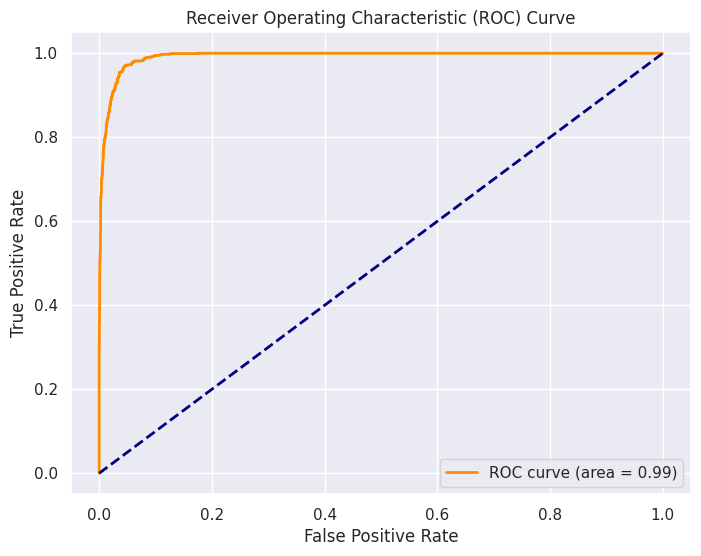

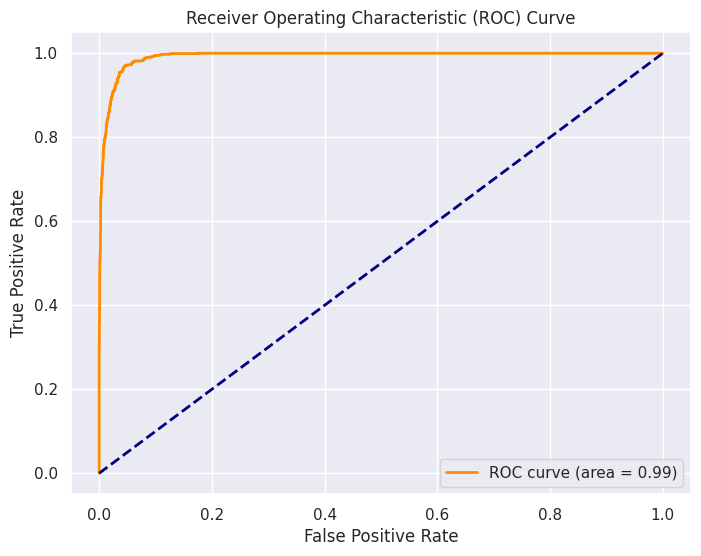

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [68]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 features
print("Top 10 Features in Random Forest :")
print(top_features)

Top 10 Features in Random Forest :
                   Feature  Importance
41            EXT_SOURCE_2    0.107856
42            EXT_SOURCE_3    0.077925
40            EXT_SOURCE_1    0.050396
16              DAYS_BIRTH    0.047322
17           DAYS_EMPLOYED    0.044733
19         DAYS_ID_PUBLISH    0.038645
7               AMT_CREDIT    0.038481
94  DAYS_LAST_PHONE_CHANGE    0.038312
8              AMT_ANNUITY    0.036552
9          AMT_GOODS_PRICE    0.035860
Top 10 Features in Random Forest :
                   Feature  Importance
41            EXT_SOURCE_2    0.107856
42            EXT_SOURCE_3    0.077925
40            EXT_SOURCE_1    0.050396
16              DAYS_BIRTH    0.047322
17           DAYS_EMPLOYED    0.044733
19         DAYS_ID_PUBLISH    0.038645
7               AMT_CREDIT    0.038481
94  DAYS_LAST_PHONE_CHANGE    0.038312
8              AMT_ANNUITY    0.036552
9          AMT_GOODS_PRICE    0.035860


#Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the model
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Display the results
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy on Test Set: 0.6672676837725381
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      3596
         1.0       0.67      0.65      0.66      3614

    accuracy                           0.67      7210
   macro avg       0.67      0.67      0.67      7210
weighted avg       0.67      0.67      0.67      7210

Accuracy on Test Set: 0.6672676837725381
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      3596
         1.0       0.67      0.65      0.66      3614

    accuracy                           0.67      7210
   macro avg       0.67      0.67      0.67      7210
weighted avg       0.67      0.67      0.67      7210



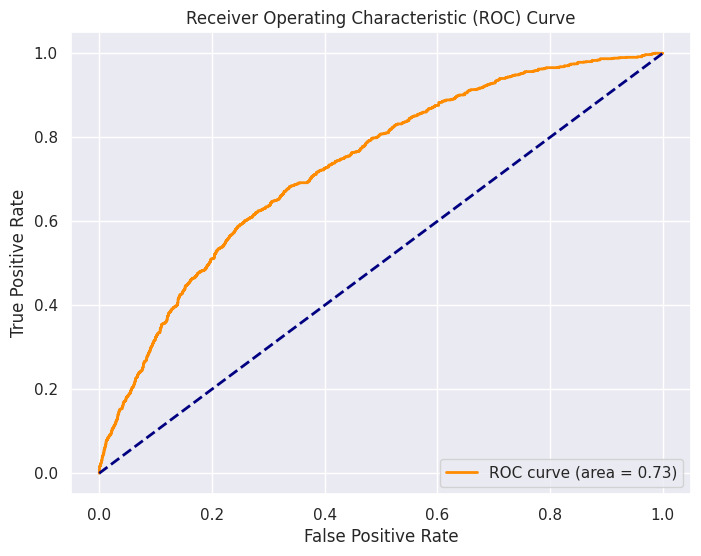

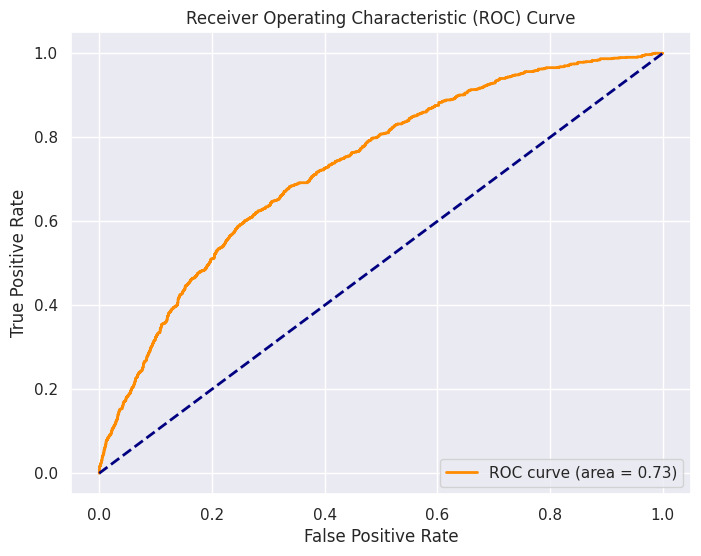

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = logreg_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [72]:
# Get feature names
feature_names = X_train.columns

# Get the coefficients of the features
coefficients = logreg_classifier.coef_[0]

# Create a DataFrame to associate feature names with their coefficients
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to get the top features
top_features = feature_coefficients.reindex(feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top 10 features
print("Top 10 Features:")
print(top_features.head(10))

Top 10 Features:
                        Feature  Coefficient
9               AMT_GOODS_PRICE    -3.309291
7                    AMT_CREDIT     3.099419
41                 EXT_SOURCE_2    -1.944087
28              CNT_FAM_MEMBERS    -1.035668
42                 EXT_SOURCE_3    -1.029513
8                   AMT_ANNUITY     1.016788
87               TOTALAREA_MODE     0.835901
120  AMT_REQ_CREDIT_BUREAU_YEAR     0.830009
1            NAME_CONTRACT_TYPE     0.804881
16                   DAYS_BIRTH     0.734133
Top 10 Features:
                        Feature  Coefficient
9               AMT_GOODS_PRICE    -3.309291
7                    AMT_CREDIT     3.099419
41                 EXT_SOURCE_2    -1.944087
28              CNT_FAM_MEMBERS    -1.035668
42                 EXT_SOURCE_3    -1.029513
8                   AMT_ANNUITY     1.016788
87               TOTALAREA_MODE     0.835901
120  AMT_REQ_CREDIT_BUREAU_YEAR     0.830009
1            NAME_CONTRACT_TYPE     0.804881
16                   

#Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming df_clean_normalized is your cleaned and normalized DataFrame
X = df_clean_normalized.drop(columns=['TARGET'])
y = df_clean_normalized['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Decision Tree Classifier Performance:
Accuracy: 0.9386

Confusion Matrix:
[[3153  443]
 [   0 3614]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      3596
         1.0       0.89      1.00      0.94      3614

    accuracy                           0.94      7210
   macro avg       0.95      0.94      0.94      7210
weighted avg       0.95      0.94      0.94      7210

Decision Tree Classifier Performance:
Accuracy: 0.9386

Confusion Matrix:
[[3153  443]
 [   0 3614]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      3596
         1.0       0.89      1.00      0.94      3614

    accuracy                           0.94      7210
   macro avg       0.95      0.94      0.94      7210
weighted avg       0.95      0.94      0.94      7210



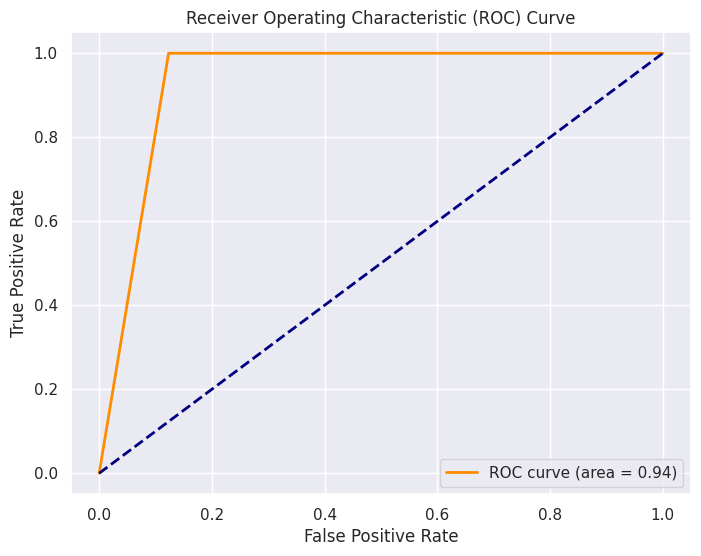

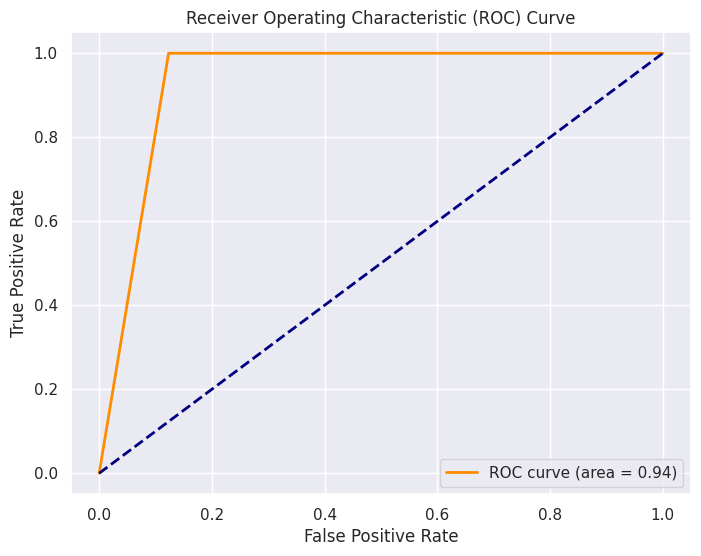

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [75]:
# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 features
print("Top 10 Features in Decision Tree:")
print(top_features)

Top 10 Features in Decision Tree:
                   Feature  Importance
41            EXT_SOURCE_2    0.134979
42            EXT_SOURCE_3    0.090646
16              DAYS_BIRTH    0.063107
17           DAYS_EMPLOYED    0.056520
18       DAYS_REGISTRATION    0.052014
0               SK_ID_CURR    0.044516
8              AMT_ANNUITY    0.042084
94  DAYS_LAST_PHONE_CHANGE    0.039488
19         DAYS_ID_PUBLISH    0.039249
7               AMT_CREDIT    0.034128
Top 10 Features in Decision Tree:
                   Feature  Importance
41            EXT_SOURCE_2    0.134979
42            EXT_SOURCE_3    0.090646
16              DAYS_BIRTH    0.063107
17           DAYS_EMPLOYED    0.056520
18       DAYS_REGISTRATION    0.052014
0               SK_ID_CURR    0.044516
8              AMT_ANNUITY    0.042084
94  DAYS_LAST_PHONE_CHANGE    0.039488
19         DAYS_ID_PUBLISH    0.039249
7               AMT_CREDIT    0.034128
